In [118]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb

from warnings import filterwarnings
filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.model_selection import cross_val_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [119]:
df_origin = pd.read_csv('train.csv')
df = df_origin.copy()
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [429]:
df.shape

(74111, 29)

In [430]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,74111.0,1.126662e+07,6.081735e+06,344.000000,6.261964e+06,1.225415e+07,1.640226e+07,2.123090e+07
log_price,74111.0,4.782069e+00,7.173938e-01,0.000000,4.317488e+00,4.709530e+00,5.220356e+00,7.600402e+00
accommodates,74111.0,3.155146e+00,2.153589e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,73911.0,1.235263e+00,5.820441e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
latitude,74111.0,3.844596e+01,3.080167e+00,33.338905,3.412791e+01,4.066214e+01,4.074610e+01,4.239044e+01
longitude,74111.0,-9.239753e+01,2.170532e+01,-122.511500,-1.183424e+02,-7.699696e+01,-7.395466e+01,-7.098505e+01
number_of_reviews,74111.0,2.090057e+01,3.782864e+01,0.000000,1.000000e+00,6.000000e+00,2.300000e+01,6.050000e+02
review_scores_rating,57389.0,9.406736e+01,7.836556e+00,20.000000,9.200000e+01,9.600000e+01,1.000000e+02,1.000000e+02
bedrooms,74020.0,1.265793e+00,8.521435e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
beds,73980.0,1.710868e+00,1.254142e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.800000e+01


In [431]:
df.nunique()

id                        74111
log_price                 767  
property_type             35   
room_type                 3    
amenities                 67122
accommodates              16   
bathrooms                 17   
bed_type                  5    
cancellation_policy       5    
cleaning_fee              2    
city                      6    
description               73479
first_review              2554 
host_has_profile_pic      2    
host_identity_verified    2    
host_response_rate        80   
host_since                3087 
instant_bookable          2    
last_review               1371 
latitude                  74111
longitude                 74111
name                      73359
neighbourhood             619  
number_of_reviews         371  
review_scores_rating      54   
thumbnail_url             65883
zipcode                   769  
bedrooms                  11   
beds                      18   
dtype: int64

In [432]:
df.dtypes

id                        int64  
log_price                 float64
property_type             object 
room_type                 object 
amenities                 object 
accommodates              int64  
bathrooms                 float64
bed_type                  object 
cancellation_policy       object 
cleaning_fee              bool   
city                      object 
description               object 
first_review              object 
host_has_profile_pic      object 
host_identity_verified    object 
host_response_rate        object 
host_since                object 
instant_bookable          object 
last_review               object 
latitude                  float64
longitude                 float64
name                      object 
neighbourhood             object 
number_of_reviews         int64  
review_scores_rating      float64
thumbnail_url             object 
zipcode                   object 
bedrooms                  float64
beds                      float64
dtype: object

In [433]:
df.isnull().sum()

id                        0    
log_price                 0    
property_type             0    
room_type                 0    
amenities                 0    
accommodates              0    
bathrooms                 200  
bed_type                  0    
cancellation_policy       0    
cleaning_fee              0    
city                      0    
description               0    
first_review              15864
host_has_profile_pic      188  
host_identity_verified    188  
host_response_rate        18299
host_since                188  
instant_bookable          0    
last_review               15827
latitude                  0    
longitude                 0    
name                      0    
neighbourhood             6872 
number_of_reviews         0    
review_scores_rating      16722
thumbnail_url             8216 
zipcode                   966  
bedrooms                  91   
beds                      131  
dtype: int64

In [434]:
missing_percentage = df.isnull().mean() * 100
# Filter columns with missing values
columns_with_missing_values = missing_percentage[missing_percentage > 0]
# Print the columns with missing values and their percentages
for column, percentage in columns_with_missing_values.items():
    print(f"{column}' : {percentage:.2f}%")

bathrooms' : 0.27%
first_review' : 21.41%
host_has_profile_pic' : 0.25%
host_identity_verified' : 0.25%
host_response_rate' : 24.69%
host_since' : 0.25%
last_review' : 21.36%
neighbourhood' : 9.27%
review_scores_rating' : 22.56%
thumbnail_url' : 11.09%
zipcode' : 1.30%
bedrooms' : 0.12%
beds' : 0.18%


In [435]:
pd.set_option('display.max_colwidth', 0)
df[['property_type','room_type','bed_type','cancellation_policy',
      'cleaning_fee','city','host_has_profile_pic','host_identity_verified',
     'host_response_rate','instant_bookable','neighbourhood']].agg(['unique']).transpose()

,unique
property_type,"[Apartment, House, Condominium, Loft, Townhouse, Hostel, Guest suite, Bed & Breakfast, Bungalow, Guesthouse, Dorm, Other, Camper/RV, Villa, Boutique hotel, Timeshare, In-law, Boat, Serviced apartment, Castle, Cabin, Treehouse, Tipi, Vacation home, Tent, Hut, Casa particular, Chalet, Yurt, Earth House, Parking Space, Train, Cave, Lighthouse, Island]"
room_type,"[Entire home/apt, Private room, Shared room]"
bed_type,"[Real Bed, Futon, Pull-out Sofa, Couch, Airbed]"
cancellation_policy,"[strict, moderate, flexible, super_strict_30, super_strict_60]"
cleaning_fee,"[True, False]"
city,"[NYC, SF, DC, LA, Chicago, Boston]"
host_has_profile_pic,"[t, nan, f]"
host_identity_verified,"[t, f, nan]"
host_response_rate,"[nan, 100%, 71%, 68%, 67%, 83%, 50%, 90%, 86%, 92%, 82%, 80%, 89%, 93%, 99%, 0%, 88%, 96%, 70%, 94%, 91%, 25%, 95%, 98%, 62%, 29%, 33%, 81%, 63%, 38%, 60%, 79%, 78%, 75%, 65%, 97%, 87%, 40%, 54%, 53%, 58%, 76%, 30%, 64%, 17%, 20%, 77%, 73%, 41%, 59%, 57%, 85%, 56%, 42%, 44%, 35%, 14%, 74%, 27%, 10%, 84%, 6%, 72%, 36%, 55%, 43%, 13%, 39%, 46%, 26%, 61%, 52%, 23%, 22%, 69%, 66%, 15%, 11%, 31%, 21%, 47%]"
instant_bookable,"[f, t]"


In [436]:
duplicates = df.duplicated(keep=False)
print(df[duplicates])

Empty DataFrame
Columns: [id, log_price, property_type, room_type, amenities, accommodates, bathrooms, bed_type, cancellation_policy, cleaning_fee, city, description, first_review, host_has_profile_pic, host_identity_verified, host_response_rate, host_since, instant_bookable, last_review, latitude, longitude, name, neighbourhood, number_of_reviews, review_scores_rating, thumbnail_url, zipcode, bedrooms, beds]
Index: []

[0 rows x 29 columns]


In [437]:
#dropping duplicated colunms
df=df.drop_duplicates()

In [438]:
#We created a pair of scatterplots that are used to visualize 
  #the relationship of variables in the DataFrame to each other.
# import seaborn as sns
# sns.pairplot(df, kind  ="reg");

In [439]:
df['id']

0        6901257 
1        6304928 
2        7919400 
3        13418779
4        3808709 
          ...    
74106    14549287
74107    13281809
74108    18688039
74109    17045948
74110    3534845 
Name: id, Length: 74111, dtype: int64

In [440]:
# Id is dropped since it has no affect.
df.drop("id" , axis=1 , inplace=True)

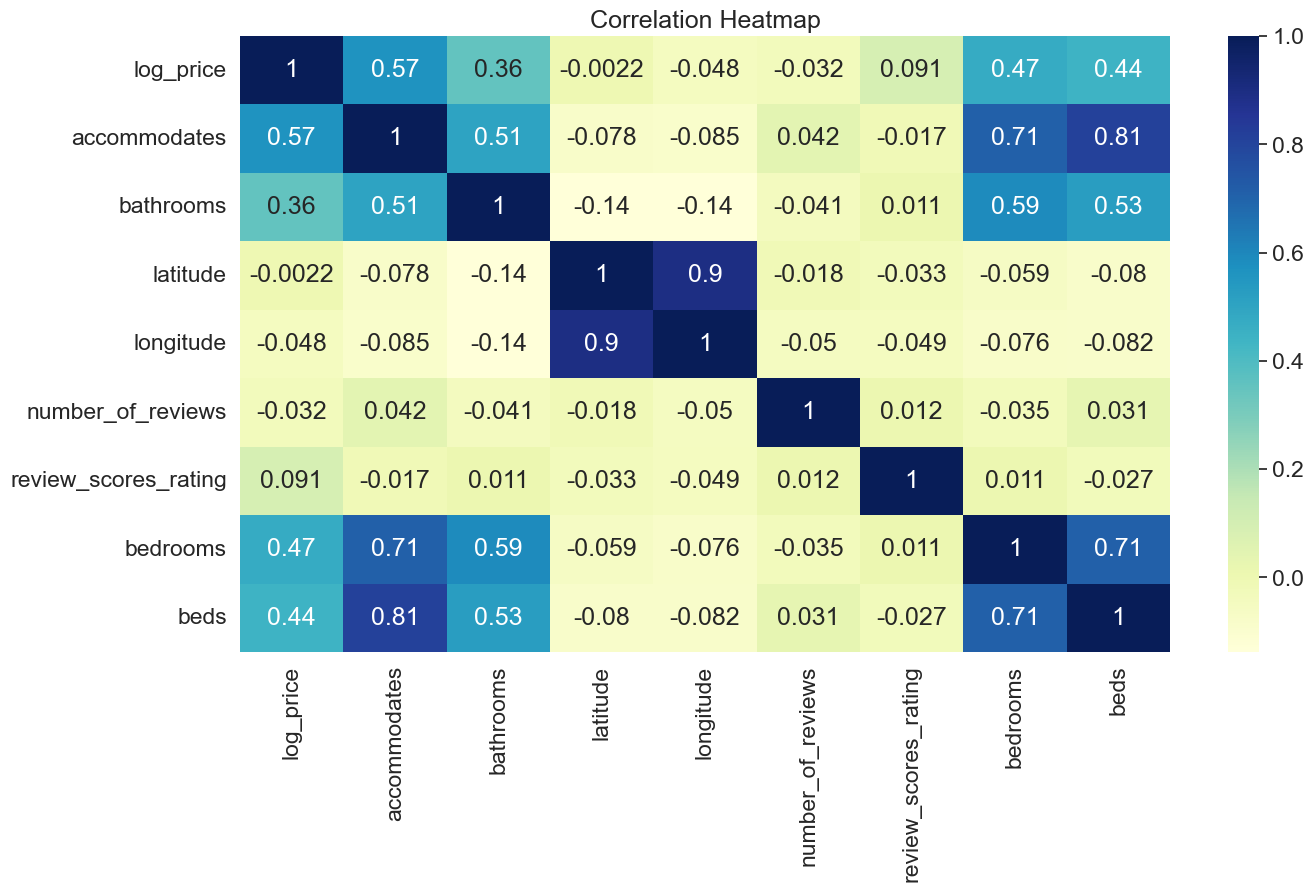

In [441]:
#we check correlation
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=np.number).columns
numeric_df = df[numeric_columns]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(15, 8))
dataplot = sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap")
plt.show()


<Axes: >

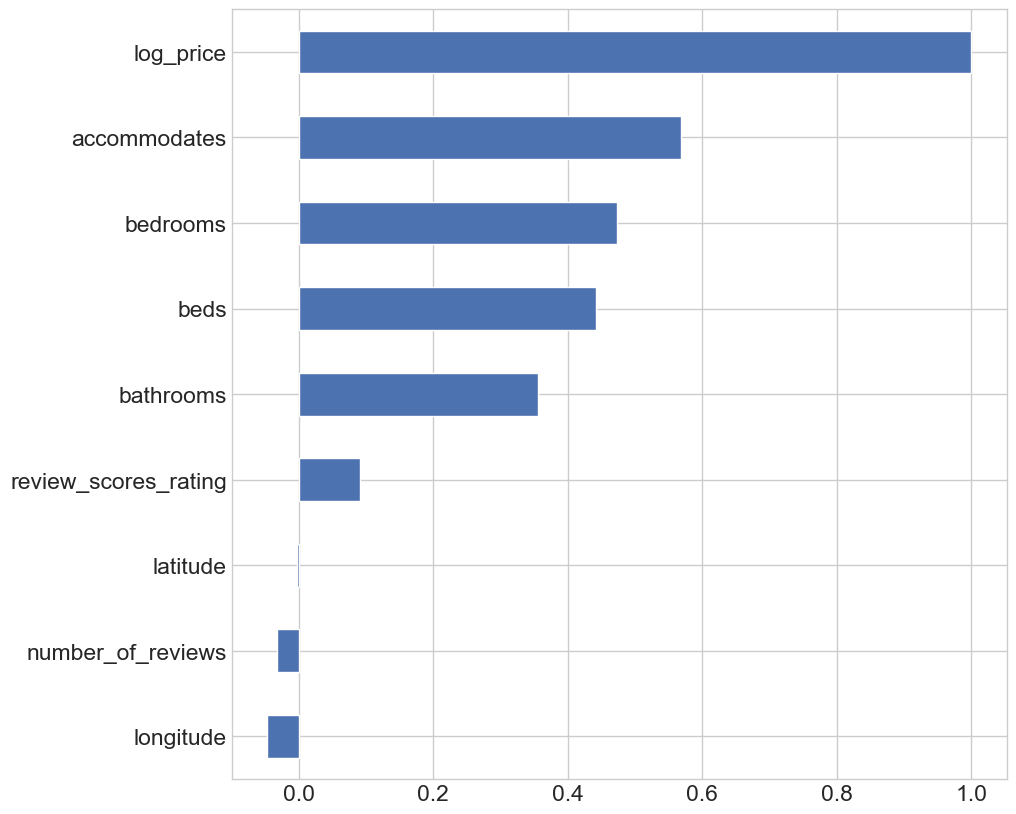

In [442]:

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(10,10))
df[numeric_columns].corr()["log_price"].sort_values().plot(kind="barh")

In [443]:
#we check the correlation between our target variable and other columns
target_correlation = df[numeric_columns].corr()['log_price'].abs().sort_values(ascending=False)
target_correlation

log_price               1.000000
accommodates            0.567574
bedrooms                0.473212
beds                    0.442153
bathrooms               0.355420
review_scores_rating    0.091219
longitude               0.047529
number_of_reviews       0.032470
latitude                0.002193
Name: log_price, dtype: float64

##### Most related numeric columns with target are:accommodates ,bedrooms ,bathrooms

# Handling Missing Values

In [444]:
df.isnull().sum()

log_price                 0    
property_type             0    
room_type                 0    
amenities                 0    
accommodates              0    
bathrooms                 200  
bed_type                  0    
cancellation_policy       0    
cleaning_fee              0    
city                      0    
description               0    
first_review              15864
host_has_profile_pic      188  
host_identity_verified    188  
host_response_rate        18299
host_since                188  
instant_bookable          0    
last_review               15827
latitude                  0    
longitude                 0    
name                      0    
neighbourhood             6872 
number_of_reviews         0    
review_scores_rating      16722
thumbnail_url             8216 
zipcode                   966  
bedrooms                  91   
beds                      131  
dtype: int64

#### id, log_price ,property_type ,room_type,amenities,accommodates, bed_type, cancellation_policy ,cleaning_fee  

In [445]:
#They have no missing value

#### property_type -Feature enginerering kismina gidecek

In [446]:
# Replacing categories that are types of houses or apartments
df.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Others' #???????????????????calistirmadim

### bathrooms

In [447]:
df["bathrooms"].isnull().sum()

200

In [448]:
# There only 200 missing values. It makes no difference
df["bathrooms"] = df['bathrooms'].fillna(round(df["bathrooms"].median()))

In [449]:
df["bathrooms"].isnull().sum()

0

#### city

In [450]:
df['city']

0        NYC
1        NYC
2        NYC
3        SF 
4        DC 
         .. 
74106    NYC
74107    LA 
74108    NYC
74109    NYC
74110    LA 
Name: city, Length: 74111, dtype: object

In [451]:
df['city'].isnull().sum()

0

### description

In [452]:
df['description']

0        Beautiful, sunlit brownstone 1-bedroom in the loveliest neighborhood in Brooklyn. Blocks from the promenade and Brooklyn Bridge Park, with their stunning views of Manhattan, and from the great shopping and food.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [453]:
df['description'].isnull().sum()

0

### first_review-last_review

In [454]:
df['first_review'].isnull().sum()

15864

In [3]:
df['first_review']

0        2016-06-18
1        2017-08-05
2        2017-04-30
3               NaN
4        2015-05-12
            ...    
74106           NaN
74107    2016-08-15
74108    2015-01-03
74109           NaN
74110    2013-09-05
Name: first_review, Length: 74111, dtype: object

In [456]:
df['last_review'].isnull().sum()

15827

In [4]:
df['last_review']

0        2016-07-18
1        2017-09-23
2        2017-09-14
3               NaN
4        2017-01-22
            ...    
74106           NaN
74107    2017-04-15
74108    2017-09-10
74109           NaN
74110    2017-04-30
Name: last_review, Length: 74111, dtype: object

In [ ]:
 # Converting to datetime
df.first_review = pd.to_datetime(df.first_review)
df.last_review = pd.to_datetime(df.last_review)

In [460]:
#We calculated the percentage of blank values in the first_review and review_scores_rating columns
print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'last_review': {round(100*df.last_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

Null values in 'first_review': 21.4%
Null values in 'last_review': 21.4%
Null values in 'review_scores_rating': 22.6%


In [461]:
#We checked for the same null values in the first_review,last_review and review_scores_rating columns
first_review_column = df['first_review']
last_review_column = df['last_review']
review_scores_rating_column = df['review_scores_rating']

nan_in_first_review = first_review_column.isna()
nan_in_last_review = last_review_column.isna()
nan_in_review_scores_rating = review_scores_rating_column.isna()

nan_match = nan_in_first_review.all() == nan_in_first_review.all() == nan_in_review_scores_rating.all()

nan_match

True

About one-fifth of listings do not have a review written for them. This is an unnecessarily large proportion of the dataset, and dropping columns loses a lot of useful information - reviews are crucial in people's decision to book, and therefore price.

This is also a dataset ratio that is too large to simply replace with median/mean values, as it will drastically skew the distribution. Also, the missing values here aren't really the missing values, because it makes sense that they're NaNs - it tells us that these are new or unbooked and not yet reviewed lists. To make the resulting model work in such a way that it can predict the prices of any Airbnb listing, including brand new listings, it's actually useful to keep them in. Therefore, we will replace them with 00-00-00

### host_has_profile_pic - host_identity_verified - host_since

In [465]:
df['host_has_profile_pic'].isnull().sum()


188

In [466]:
df['host_identity_verified'].isnull().sum()

188

In [467]:
df['host_since'].isnull().sum()

188

In [468]:
#We check the nan values

print(f"Null values in 'host_has_profile_pic': {df['host_has_profile_pic'].isnull().sum()}")
print(f"Null values in 'host_identity_verified': {df['host_identity_verified'].isnull().sum()}")
print(f"Null values in 'host_since': {df['host_since'].isnull().sum()}")

Null values in 'host_has_profile_pic': 188
Null values in 'host_identity_verified': 188
Null values in 'host_since': 188


In [470]:
#We checked for the same null values in the host_has_profile_pic and host_identity_verified columns

nan_in_profile = df['host_has_profile_pic'].isna()
nan_in_id = df['host_identity_verified'].isna()
nan_in_host_since = df['host_since'].isna()

nan_match1 = nan_in_profile.all() == nan_in_id.all() == nan_in_host_since.all()

nan_match1

True

In [14]:
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

In [15]:
#We filled the nan values
df['host_has_profile_pic'] = df['host_has_profile_pic'].fillna(0)
df['host_identity_verified'] = df['host_identity_verified'].fillna(0)
df['host_since'].fillna(df['host_since'].median(), inplace=True)

In [473]:
print(f"Null values in 'host_has_profile_pic': {df['host_has_profile_pic'].isnull().sum()}")
print(f"Null values in 'host_identity_verified': {df['host_identity_verified'].isnull().sum()}")
print(f"Null values in 'host_since': {df['host_since'].isnull().sum()}")

Null values in 'host_has_profile_pic': 0
Null values in 'host_identity_verified': 0
Null values in 'host_since': 0


### host_response_rate

In [474]:
df['host_response_rate']

0        NaN 
1        100%
2        100%
3        NaN 
4        100%
         ... 
74106    NaN 
74107    100%
74108    100%
74109    100%
74110    100%
Name: host_response_rate, Length: 74111, dtype: object

In [475]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')
df['host_response_rate']

0       NaN   
1        100.0
2        100.0
3       NaN   
4        100.0
         ...  
74106   NaN   
74107    100.0
74108    100.0
74109    100.0
74110    100.0
Name: host_response_rate, Length: 74111, dtype: float64

In [476]:
#We calculated the percentage of blank values in the host_response_rate 
print(f"Null values in 'host_response_rate': {round(100*df.host_response_rate.isna().sum()/len(df),1)}%")

Null values in 'host_response_rate': 24.7%


In [477]:
print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 94.0
Median host response rate: 100.0
Proportion of 100% host response rates: 77.5%


### instant_bookable

In [480]:
df['instant_bookable']

0        f
1        t
2        t
3        f
4        t
        ..
74106    f
74107    f
74108    t
74109    t
74110    f
Name: instant_bookable, Length: 74111, dtype: object

In [481]:
df['instant_bookable'].isnull().sum()

0

### 24-Number_of_reviews

In [483]:
df_origin['number_of_reviews'].isnull().sum()

0

### 25-review_scores_rating

In [484]:
df['review_scores_rating'].isnull().sum()

16722

In [485]:
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].mean())

df['review_scores_rating'].isnull().sum()

0

### 26-Thumbnail_url

In [486]:
# this column has nothing interesting and inclde the photos of room. We are going to 
# take this column account if there is photo of not. So ether 0 or 1.
df['thumbnail_url'] = df['thumbnail_url'].fillna(0).apply(lambda x: 1 if x else 0)
df['thumbnail_url'].isnull().sum()

0

In [487]:
df['thumbnail_url'].value_counts()

thumbnail_url
1    65895
0    8216 
Name: count, dtype: int64

### 27-zipcode

In [488]:
df['zipcode'] = df['zipcode'].astype(str).str.rstrip('.0')

In [489]:
import re

pattern = r'[^0-9]'  # Regular expression pattern to match unwanted characters
df['zipcode'][df['zipcode'].str.contains(pattern, na=False)]
# There are unwanted characters in the zipcode column. Since we can fill the missing values with coordinates. ITs better to set them None to save time

26       nan
96       nan
189      nan
340         
401      nan
        ... 
73642    nan
73763    nan
73925    nan
74060    nan
74083    nan
Name: zipcode, Length: 987, dtype: object

In [490]:
df['zipcode'][df['zipcode'].str.contains(pattern, na=False)] = None

In [491]:
# TO fill 981 zipcode missing value
# There are coordinates of the given airbnb property. With these coordinates we find the zipcodes.
# This process takes sometime
from uszipcode import SearchEngine
from geopy.geocoders import Nominatim

def get_zipcode(latitude, longitude):
 
    geolocator = Nominatim(user_agent='my_app')
    location = geolocator.reverse(f"{latitude}, {longitude}")
    address = location.raw['address']
    zipcode = address.get('postcode')
    return zipcode

for index, row in df.iterrows():
    if pd.isnull(row['zipcode']):
        zipcode = get_zipcode(row['latitude'], row['longitude'])
        df.loc[index, 'zipcode'] = zipcode

In [492]:
df['zipcode'].isnull().sum()

0

### 23-Neighbourhood

In [493]:
df['neighbourhood'].isnull().sum()
# Going to be filled with the help of coordinates

6872

In [494]:

def get_neighborhood(zipcode):
    search = SearchEngine()
    zipcode_data = search.by_zipcode(zipcode)
    if zipcode_data:
        neighborhood = zipcode_data.major_city
        if neighborhood:
            return neighborhood
        else:
            return "Neighborhood information not found."
    else:
        return "Zip code information not found."

# Iterate over your DataFrame and get neighborhood information for each zip code
for index, row in df.iterrows():
    if pd.isnull(df.loc[index, 'neighbourhood']) :
        zipcode = row['zipcode']
        neighborhood = get_neighborhood(zipcode)
        df.loc[index, 'neighbourhood'] = neighborhood

In [495]:
df['neighbourhood'].isnull().sum()

0

### 28-29-bed and bedrooms

In [496]:
# Since the missing value ratio to all data is relatively too small  we fill these parts wth the KNNImputer

from sklearn.impute import KNNImputer
# Create an instance of KNNImputer with k=5
imputer = KNNImputer(n_neighbors=5)
# Fit the imputer on the data and transform it
#df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df['beds']= np.ceil(imputer.fit_transform(df[['beds']]))
df['bedrooms']= np.ceil(imputer.fit_transform(df[['bedrooms']]))

In [500]:
df.isnull().sum()

log_price                 0    
property_type             0    
room_type                 0    
amenities                 0    
accommodates              0    
bathrooms                 0    
bed_type                  0    
cancellation_policy       0    
cleaning_fee              0    
city                      0    
description               0    
first_review              0    
host_has_profile_pic      0    
host_identity_verified    0    
host_response_rate        18299
host_since                0    
instant_bookable          0    
last_review               0    
latitude                  0    
longitude                 0    
name                      0    
neighbourhood             0    
number_of_reviews         0    
review_scores_rating      0    
thumbnail_url             0    
zipcode                   0    
bedrooms                  0    
beds                      0    
dtype: int64

In [501]:
def get_value_counts(df):
    """
    Returns the value counts of all categorical columns in the given df.
    
    Args:
        df (pandas.df): The df.
    
    Returns:
        dict: Dictionary containing value counts of each categorical column.
    """
    columns_values=['property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'accommodates',
 'bathrooms',
 'host_has_profile_pic',
 'host_identity_verified',
 'instant_bookable',
 'bedrooms',
 'beds',
 'first_review',
 'neighbourhood'

 ]
    value_counts = {}
    for column in columns_values:
        value_counts[column] = df[column].value_counts()
        
    return value_counts

## Example usage
value_counts = get_value_counts(df)
for column, counts in value_counts.items():
    print(f"Column: {column}")
    print(counts)
    print(50*'--')

Column: property_type
property_type
Apartment    50268
House        18754
Others       5089 
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Column: room_type
room_type
Entire home/apt    41310
Private room       30638
Shared room        2163 
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Column: bed_type
bed_type
Real Bed         72028
Futon            753  
Pull-out Sofa    585  
Airbed           477  
Couch            268  
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Column: cancellation_policy
cancellation_policy
strict             32374
flexible           22545
moderate           19063
super_strict_30    112  
super_strict_60    17   
Name: count, dtype: int64
-----------------------------------------------------------------------------------

In [502]:
# 10 Most expensve air bnb
top_reviewed_hosts= df.nlargest(10,'log_price').head(10)
top_reviewed_hosts

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
19210,7.600402,House,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Pool,Kitchen,""Free parking on premises"",""Smoking allowed"",""Pets allowed"",Gym,Breakfast,""Indoor fireplace"",Heating,""Family/kid friendly"",""Suitable for events"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""Laptop friendly workspace""}",10,4.5,Real Bed,strict,True,LA,...,34.101991,-118.418381,"Beverly Hills Estate Pool, Tennis & Jetliner Views",Bel Air/Beverly Crest,0,94.067365,0,9021,4.0,4.0
42672,7.600402,Apartment,Entire home/apt,"{Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Buzzer/wireless intercom"",Heating,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Fire extinguisher""}",2,1.0,Real Bed,moderate,True,NYC,...,40.728233,-73.989335,Huge Loft with Private Entrance,East Village,20,85.000000,1,10003,1.0,1.0
55453,7.600402,House,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kitchen,""Free parking on premises"",""Pets allowed"",""Indoor fireplace"",Heating,""Family/kid friendly"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,""Lock on bedroom door"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""Private entrance""}",7,3.5,Real Bed,strict,True,NYC,...,40.733003,-73.994126,Royal Manor!!!,Greenwich Village,1,80.000000,1,10003,4.0,4.0
60071,7.600402,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Elevator in building"",Heating,""Family/kid friendly"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Shampoo,""24-hour check-in"",""Hair dryer"",Iron}",6,1.0,Real Bed,strict,False,DC,...,38.947020,-77.066699,Cozy apartment in Van Ness on metro,Washington,0,94.067365,0,20008,1.0,2.0
72609,7.600402,House,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kitchen,""Free parking on premises"",""Pets allowed"",Breakfast,Heating,""Family/kid friendly"",""Suitable for events"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",Essentials,Shampoo,""Lock on bedroom door"",""Hair dryer"",Iron,""Laptop friendly workspace"",""Private entrance""}",6,2.5,Real Bed,flexible,False,DC,...,38.904998,-76.986020,Spacious Three-bedroom Trinidad Rowhouse,Trinidad,0,94.067365,0,20002,3.0,3.0
3063,7.598399,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air conditioning"",Pool,Kitchen,""Free parking on premises"",""Indoor fireplace"",Heating,""Family/kid friendly"",""Suitable for events"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Safety card"",""Fire extinguisher"",Essentials,Shampoo,""Lock on bedroom door"",""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace""}",16,7.5,Real Bed,strict,True,LA,...,34.123808,-118.628714,Tara Sanctuary,Topanga,0,94.067365,1,9029,8.0,11.0
9390,7.598399,House,Private room,"{""Wireless Internet"",""Free parking on premises"",Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",Essentials,Hangers}",2,1.0,Real Bed,strict,False,SF,...,37.787035,-122.493215,Golden Gate Penthouse Suite at Casa al Mare,Sea Cliff,0,94.067365,1,94121,1.0,1.0
20722,7.598399,House,Entire home/apt,"{Internet,""Wireless Internet"",""Air conditioning"",Pool,Kitchen,""Free parking on premises"",""Smoking allowed"",""Pets allowed"",""Hot tub"",""Indoor fireplace"",Heating,""Family/kid friendly"",""Suitable for events"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""Safety card"",Essentials,Shampoo,""Lock on bedroom door"",""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace""}",16,5.5,Real Bed,strict,

# Visualition
### Value Counts

In [503]:
# Function to plot catplot graphs
def plot_catplot(h,v,he,a):
    sns.set(font_scale=1.5)
    sns.catplot(x=h,kind=v,data=df,height=he, aspect = a)


def plot_violinplot(h,v):
    plt.figure(figsize=(15,8))
    sns.set(font_scale=1.5)
    sns.violinplot(data=df, x=h, y=v, palette='GnBu_d')
    plt.title('Density and distribution of prices ', fontsize=15)
    plt.xlabel(h)
    plt.ylabel(v)

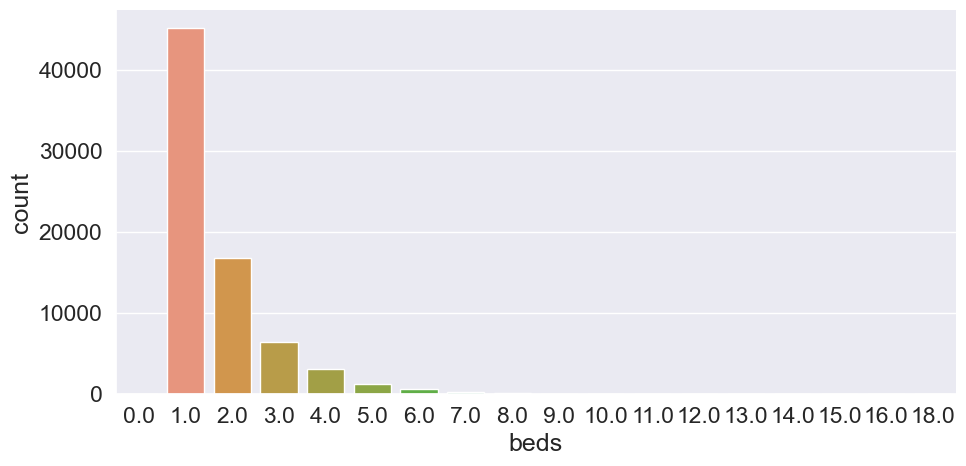

In [504]:
plot_catplot("beds", "count", 5, 2)

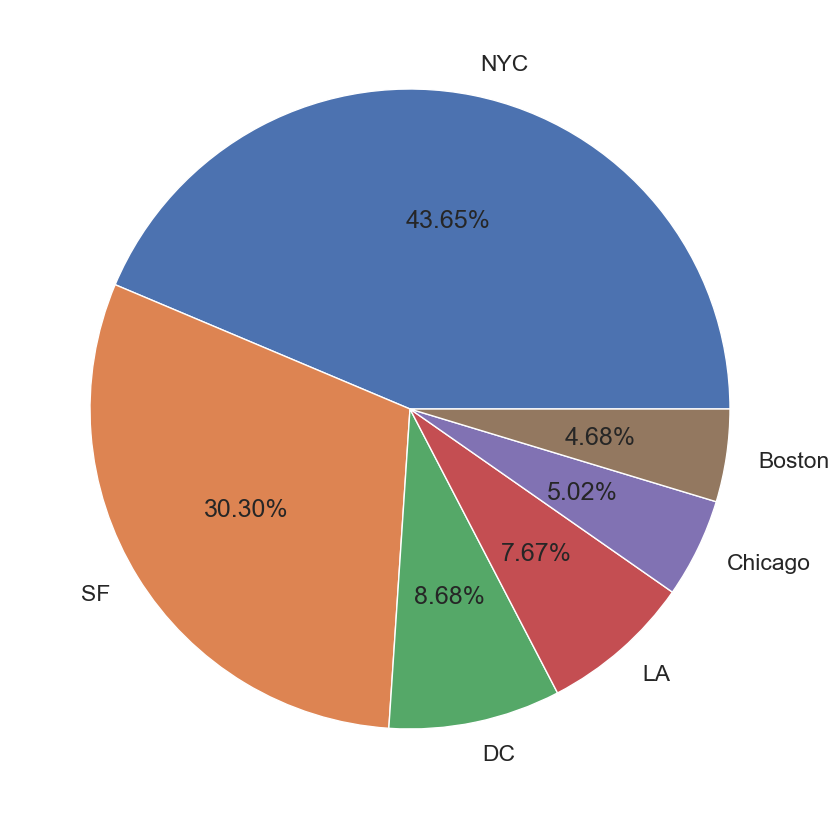

In [505]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = list(df.city.unique())
students =list(df.city.value_counts())
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

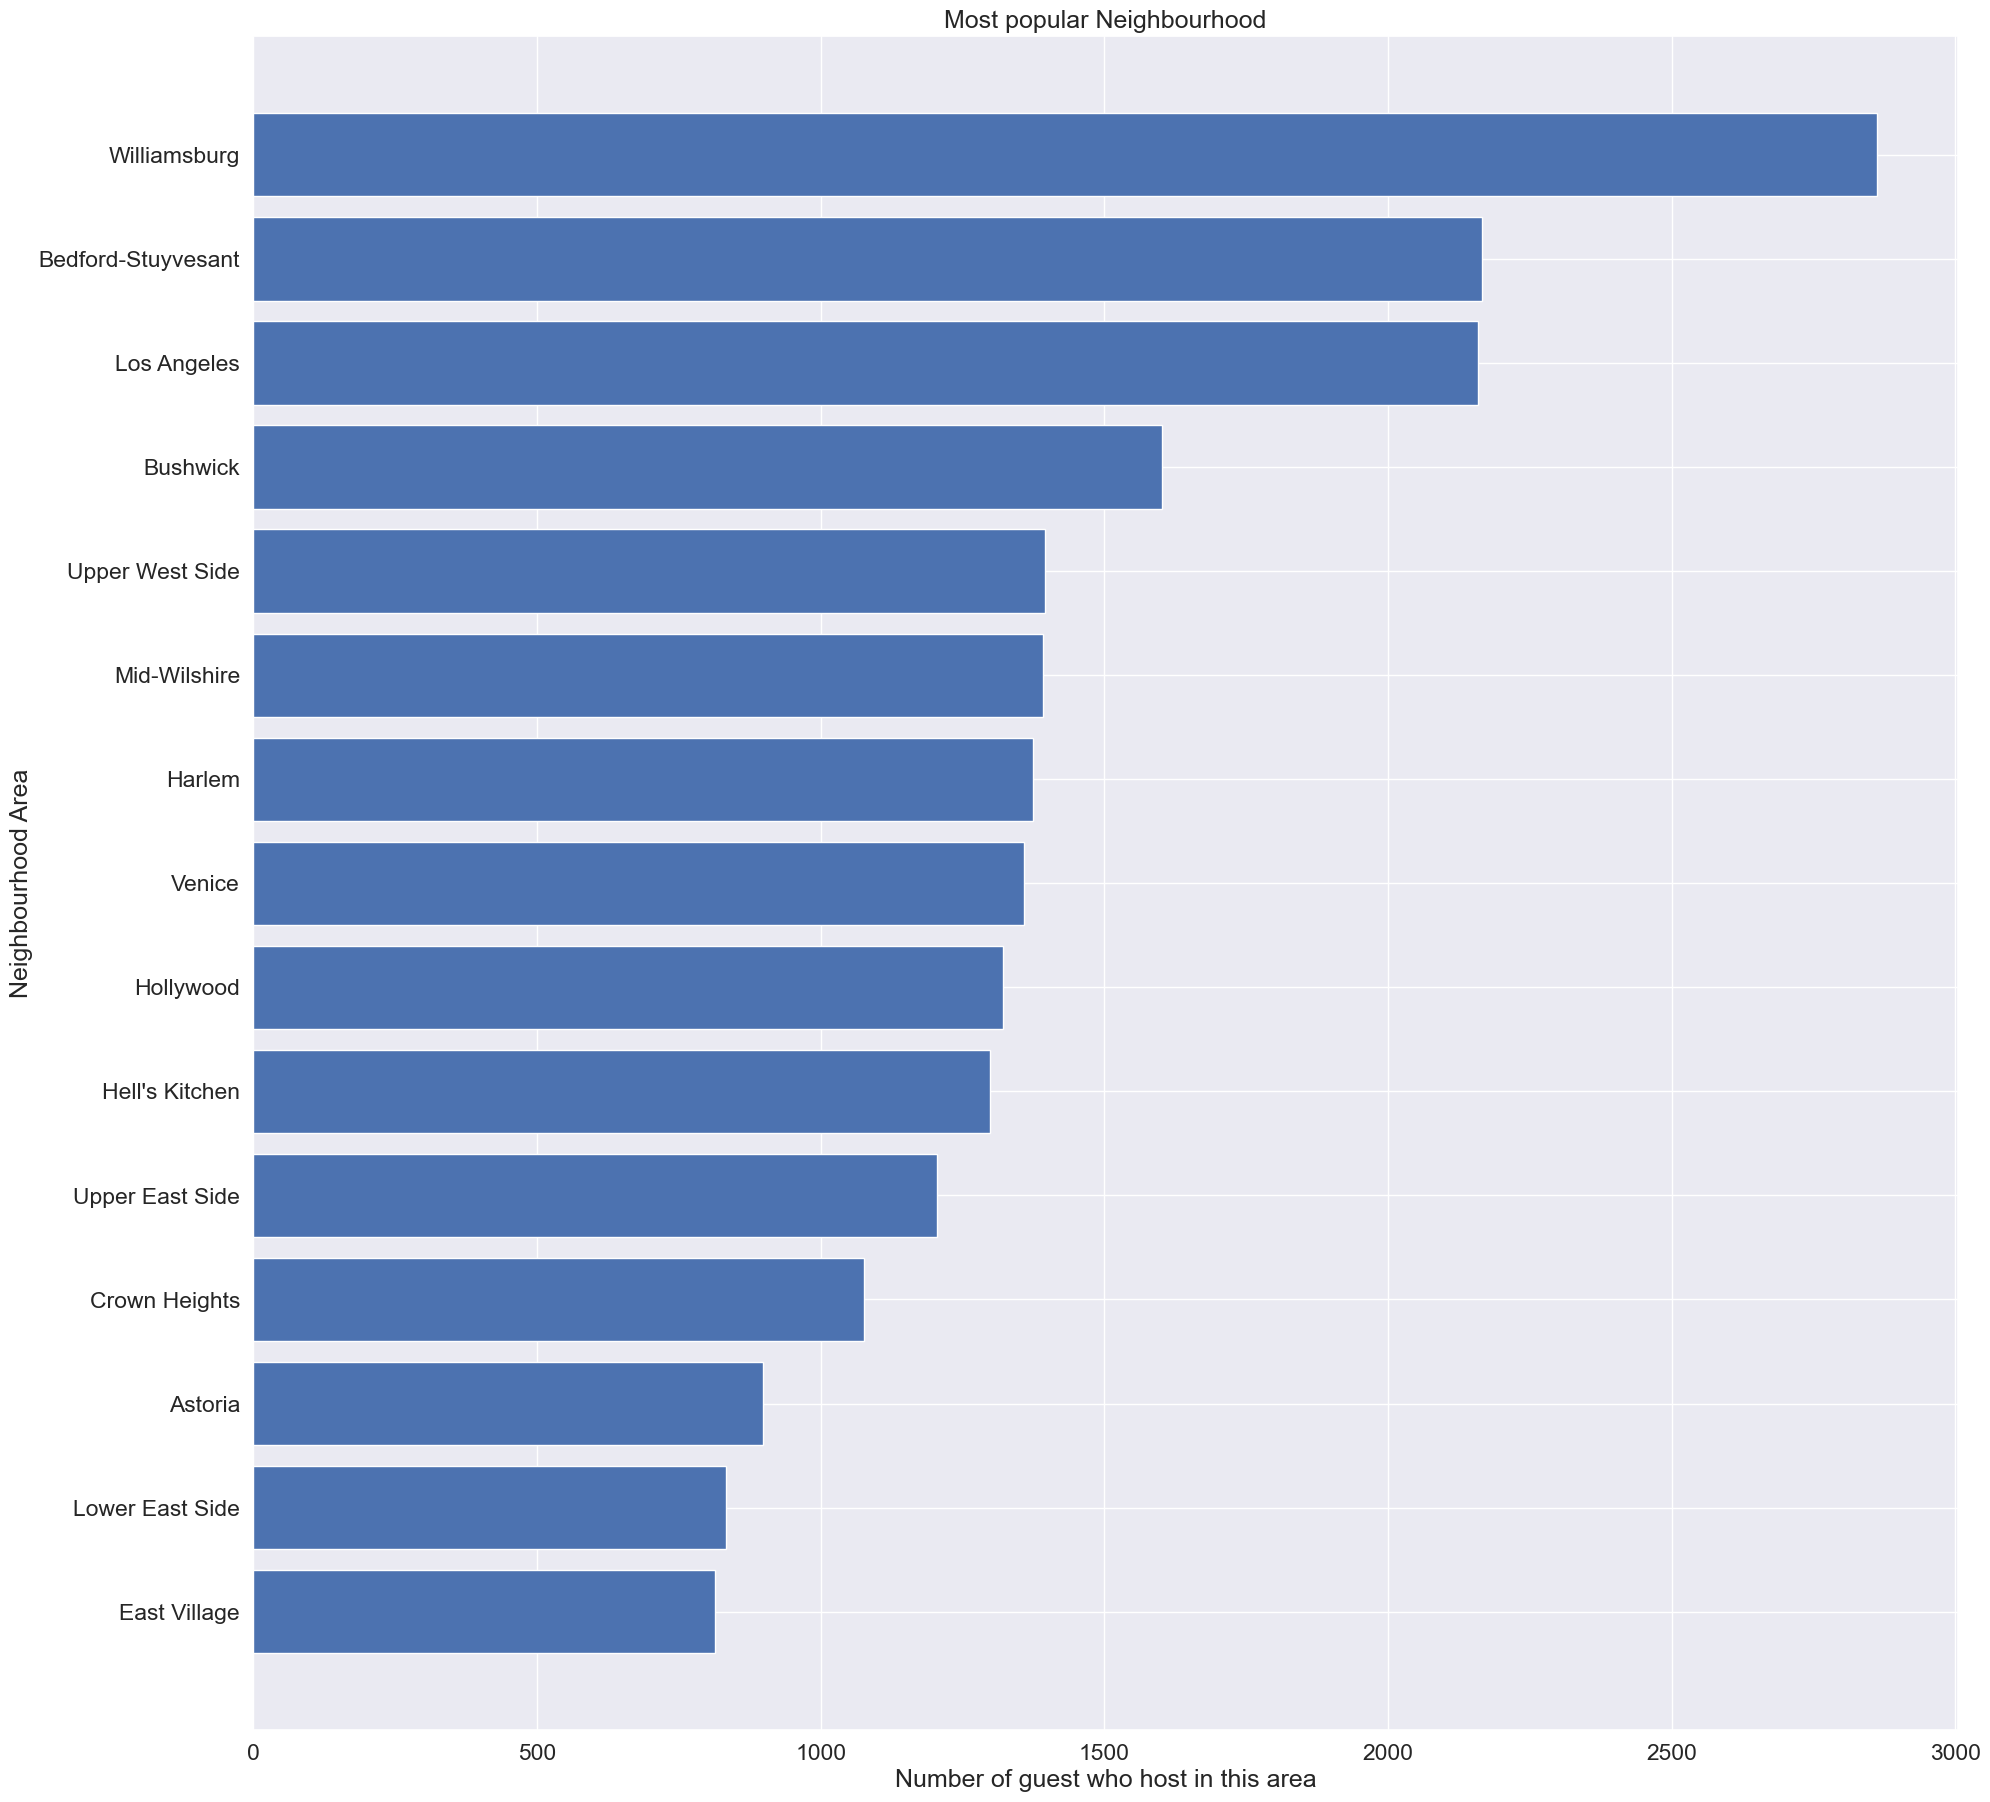

In [506]:
data = df.neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,22))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)
plt.show()

In [507]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values,rotation='vertical')
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

In [508]:
categoric_data = []
for column in df.columns:
    
    if df[column].dtypes != "float64" and df[column].dtypes != "int64":
        categoric_data.append(column)
numeric_columns = df.select_dtypes(include=[np.number]).columns

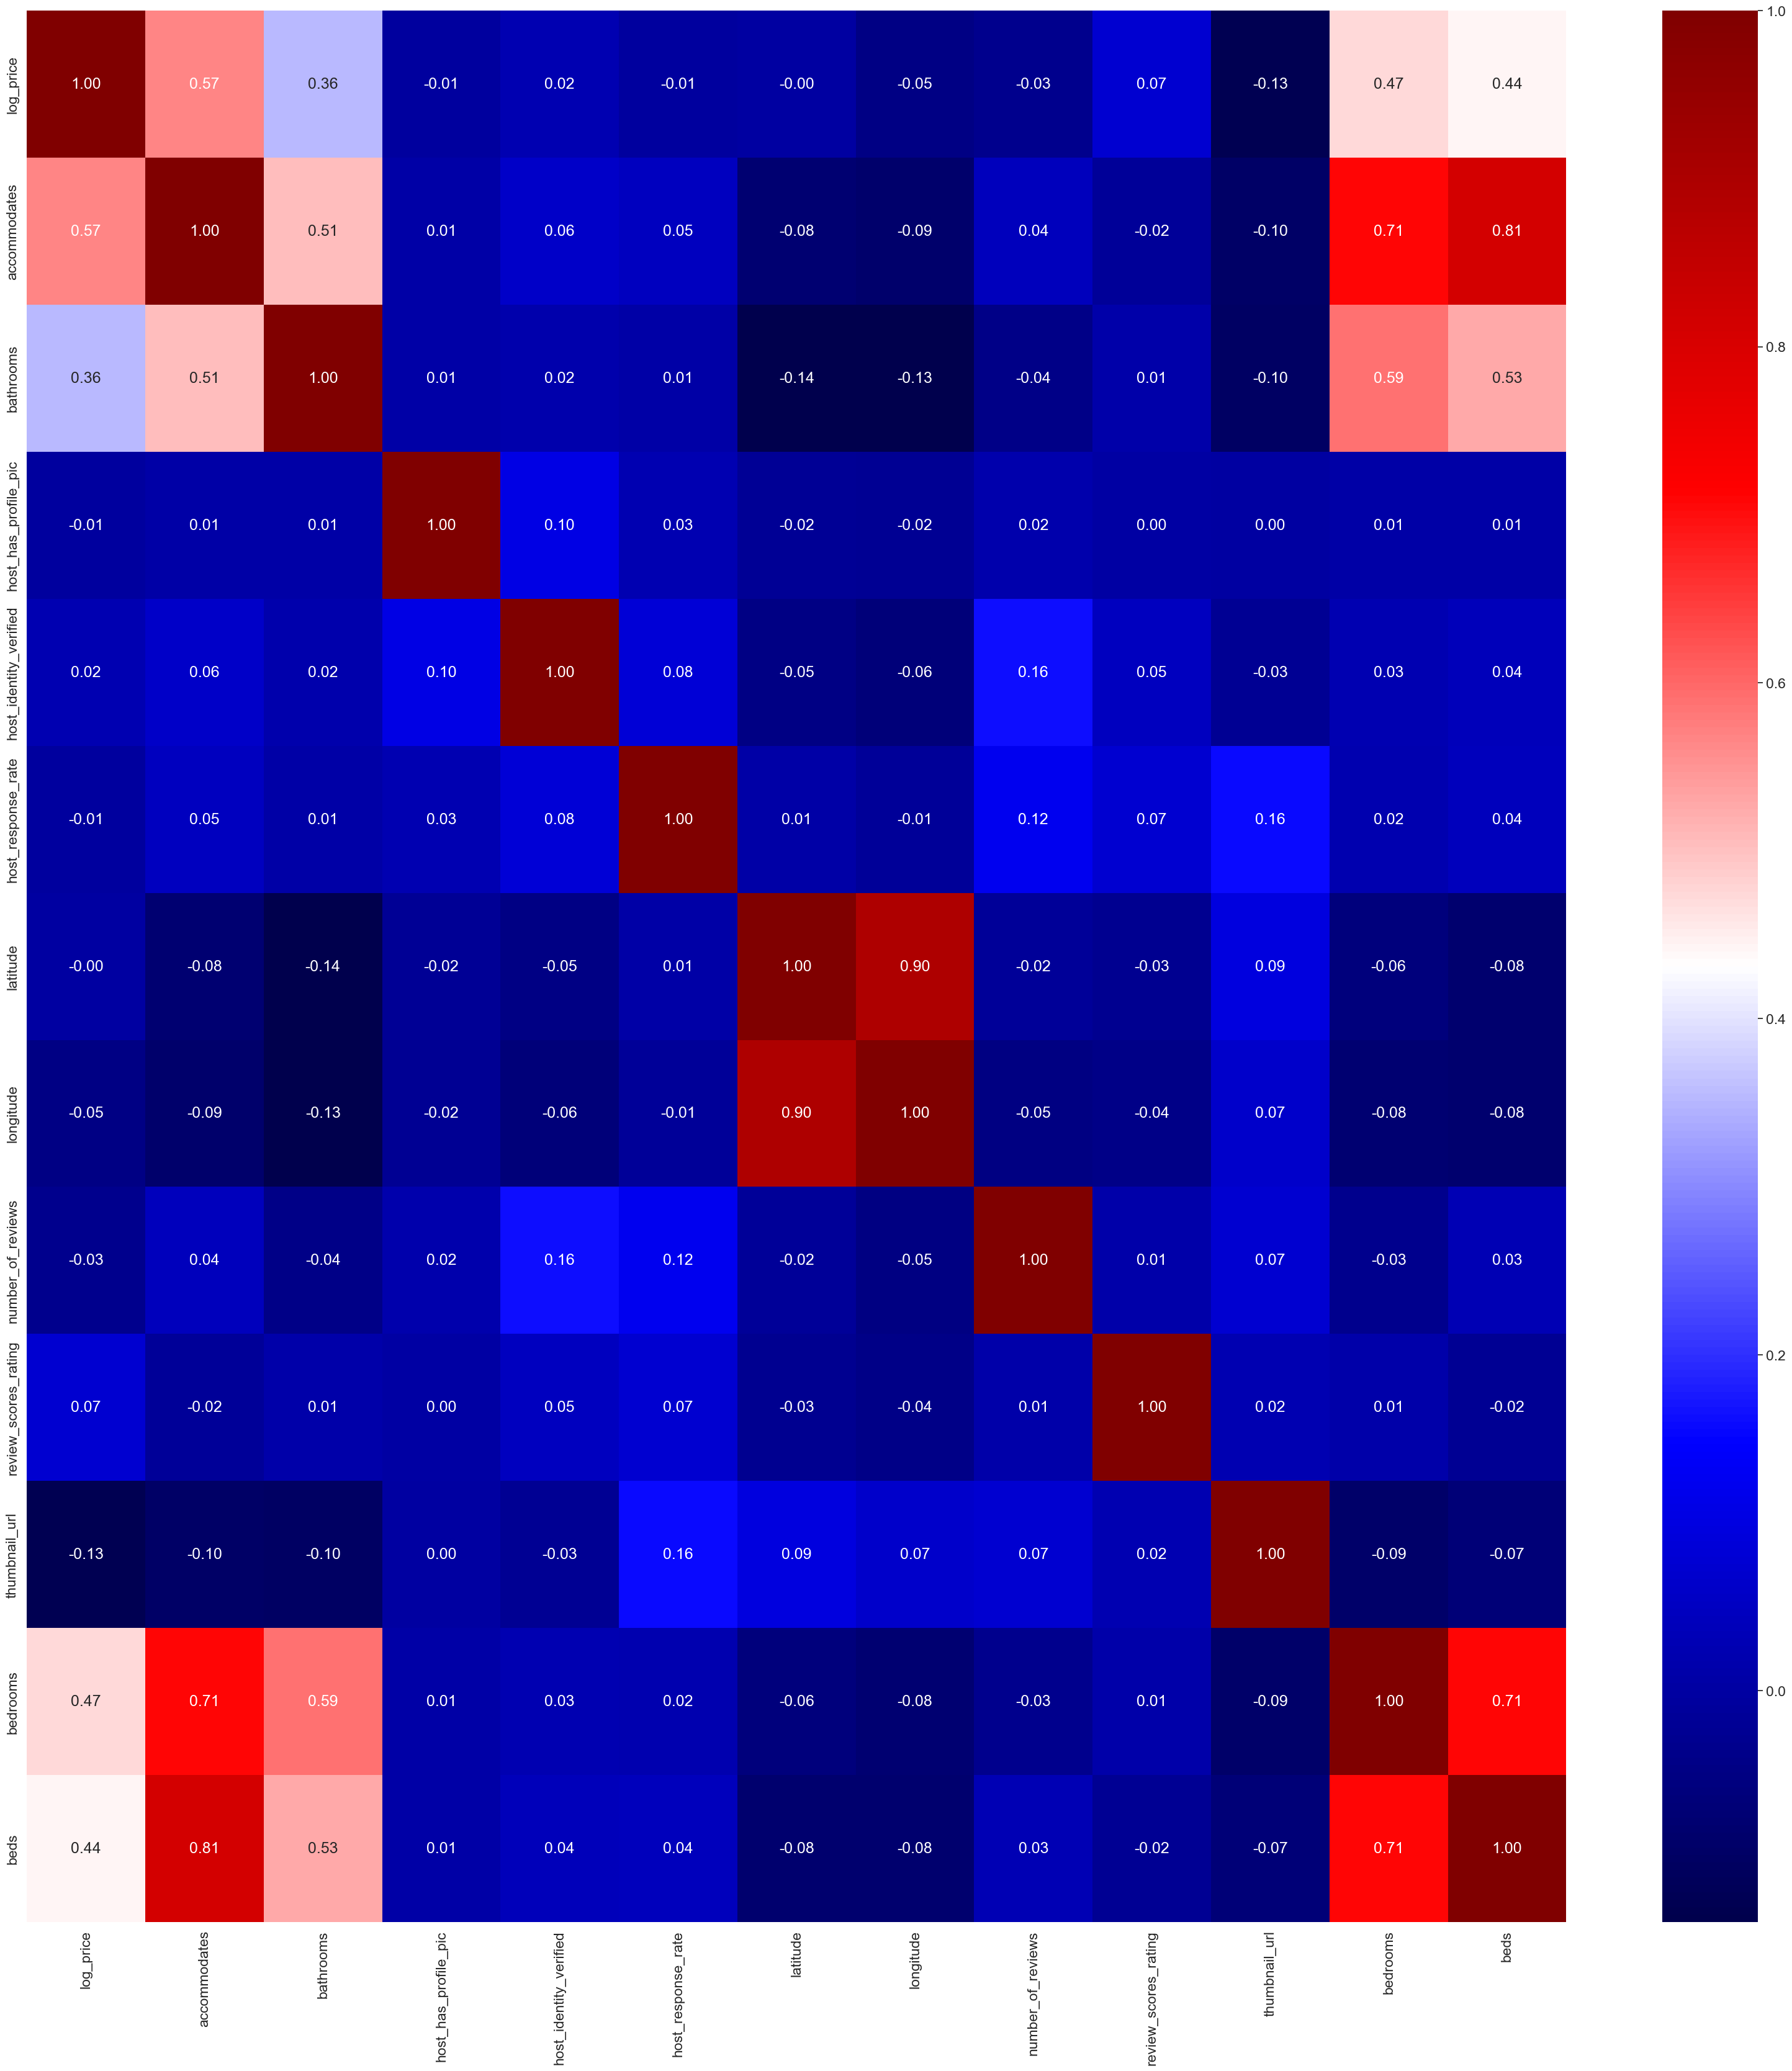

In [509]:
plt.figure(figsize = (40,40))
sns.heatmap(df[numeric_columns].corr(), annot=True, fmt=".2f", cmap="seismic")
plt.show()

In [697]:
def plot_hist(df,variable):
    plt.figure(figsize=(9, 3))
    plt.hist(df[variable], bins=50)
    plt.xlabel(variable)  # Rotate x-label vertically
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

In [511]:
grouped_data = df[["neighbourhood", "log_price"]].groupby("neighbourhood").mean()
value_counts = df["neighbourhood"].value_counts()

# Add value counts to the grouped data
grouped_data['Value Counts'] = value_counts
grouped_data.sort_values(by="Value Counts", ascending=False)[:10]

,log_price,Value Counts
neighbourhood,,
Williamsburg,4.740027,2862
Bedford-Stuyvesant,4.423185,2166
Los Angeles,4.607737,2158
Bushwick,4.274465,1601
Upper West Side,5.001347,1396
Mid-Wilshire,4.674082,1392
Harlem,4.636397,1374
Venice,5.118042,1358
Hollywood,4.688395,1321


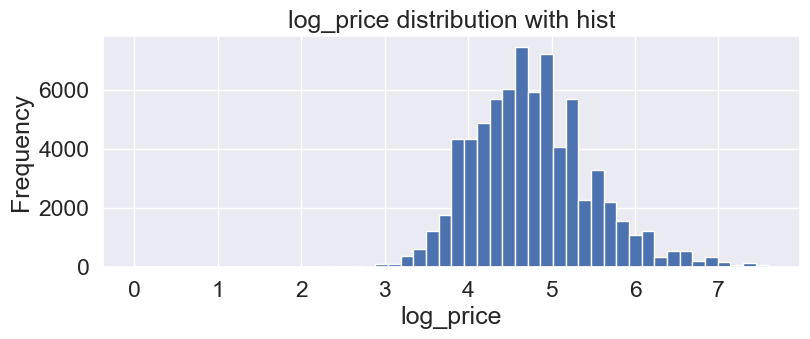

In [512]:

plot_hist('log_price')

#### Relationship between log_price and categorical columns

In [513]:
def groupby_target(column):
    # Relationship between target and categorical columns
    grouped_data = df[[column, "log_price"]].groupby(column).mean().sort_values(by="log_price", ascending=False)
    value_counts = df[column].value_counts()

    # Add value counts to the grouped data
    grouped_data['Value Counts'] = value_counts

    # Print the updated grouped data
    print(grouped_data)
   
    print(50*'--')

In [514]:
for i in categoric_data:
    groupby_target(i)

               log_price  Value Counts
property_type                         
Others         4.871325   5089        
House          4.803129   18754       
Apartment      4.765176   50268       
----------------------------------------------------------------------------------------------------
                 log_price  Value Counts
room_type                               
Entire home/apt  5.167217   41310       
Private room     4.327753   30638       
Shared room      3.861535   2163        
----------------------------------------------------------------------------------------------------
                                                                                                                                                                                                                                                                                                                                                                                                              

#### -Apartmant and house have more impact on price and they are most frequent

#### -Although the price of Entire home/apt are over the mean, they are most preferred.

#### -Bed type consisst of 72000 real bed. We consider this as realbad and others.

#### -Cancellation_policy. As the flexibity increases thhe price also increase. Expensive houses suffer more when the booking is cancelled. Therefore their policies are strickter. Since the extereme values are so few , we will add those in to strict.

#### -cleaning_fee has affect on price. This is not included in price. So extra. People may think it would be cleaner if there is cleaning fee.

#### -Cities have little affet on price ????

#### - accommodates has large affect on price. We will handle outliears.

#### -  bathrooms . Outliears need to be handled ????

#### - host_has_profile_pic this column consist of only 226 false value. So has almost no affect on price

#### - host_identity_verified has no affect. 

#### - Has almost no affexct on price. But has affect on preferebility

#### - bedrooms has large affect on price. Outliears need to be handled

#### - beds has large affect on price. Outliears need to be handled

#### - first_review and last_review. From last review to now, between first and last review , year of first review




In [103]:
def catplot(column):
    if len(df[column].unique()) <= 20:
        g = sns.catplot(x=column, y="log_price", data=df, kind="bar", height=8)
        g.set_ylabels("log_price")
        plt.show()

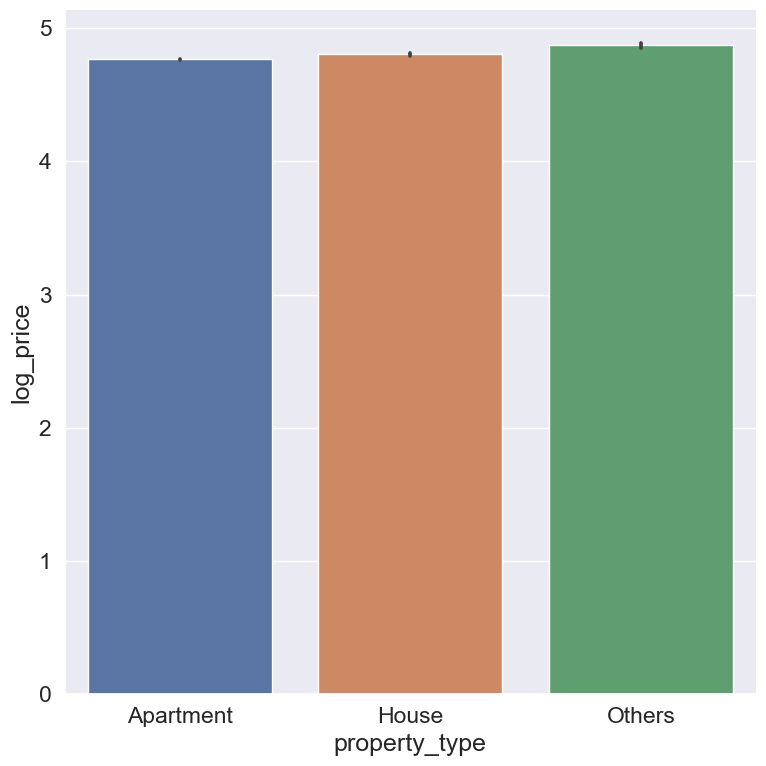

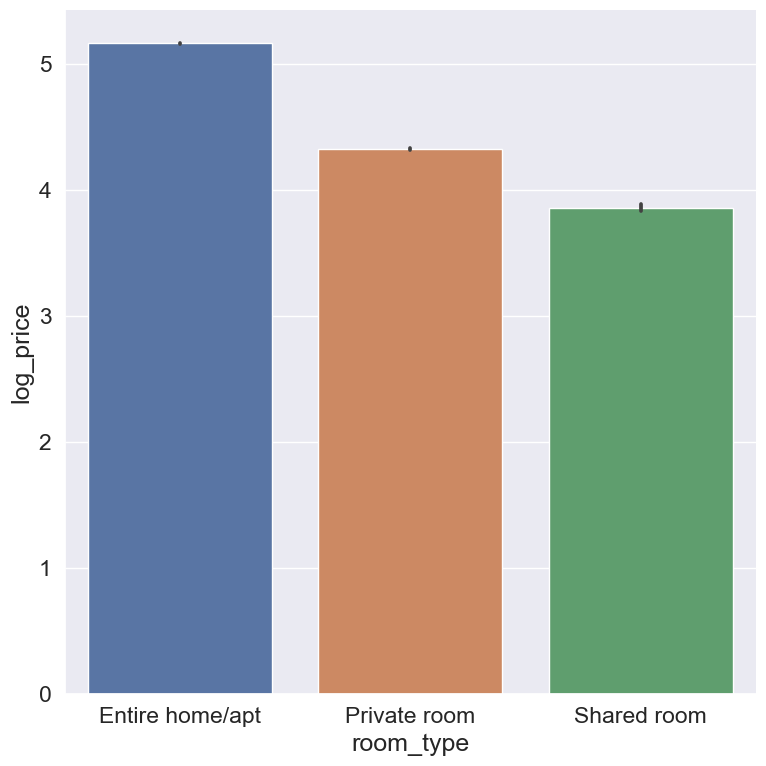

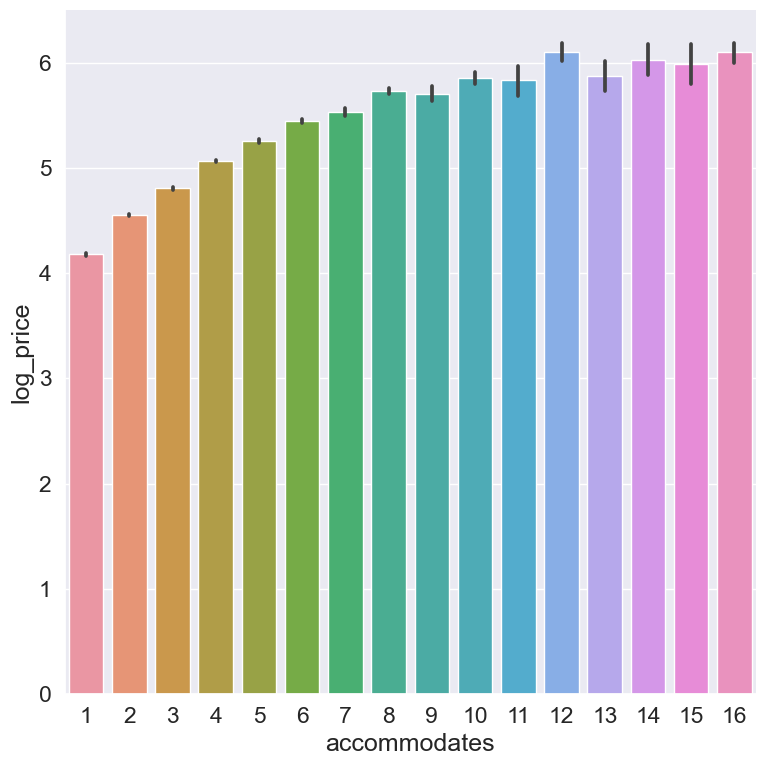

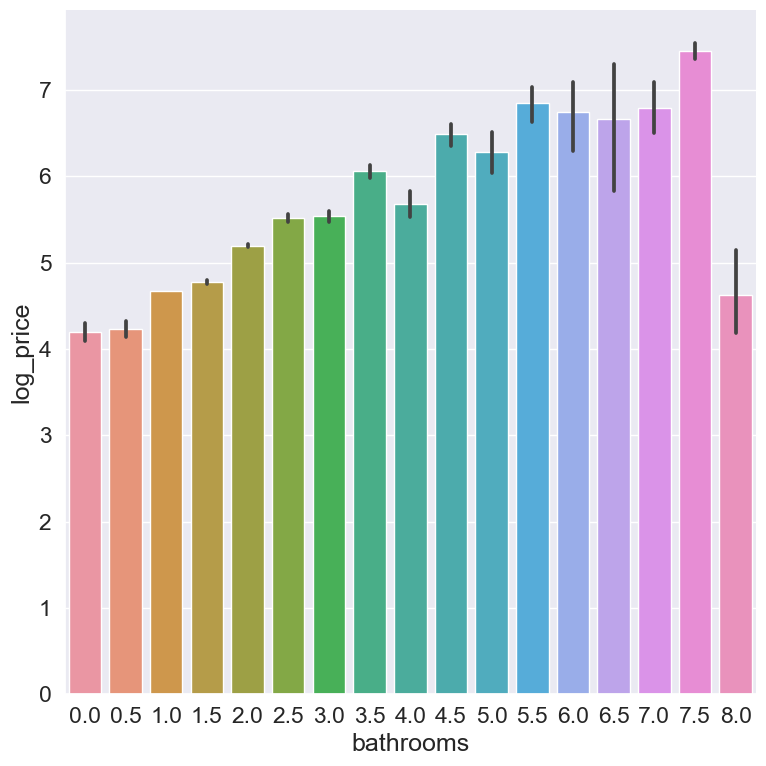

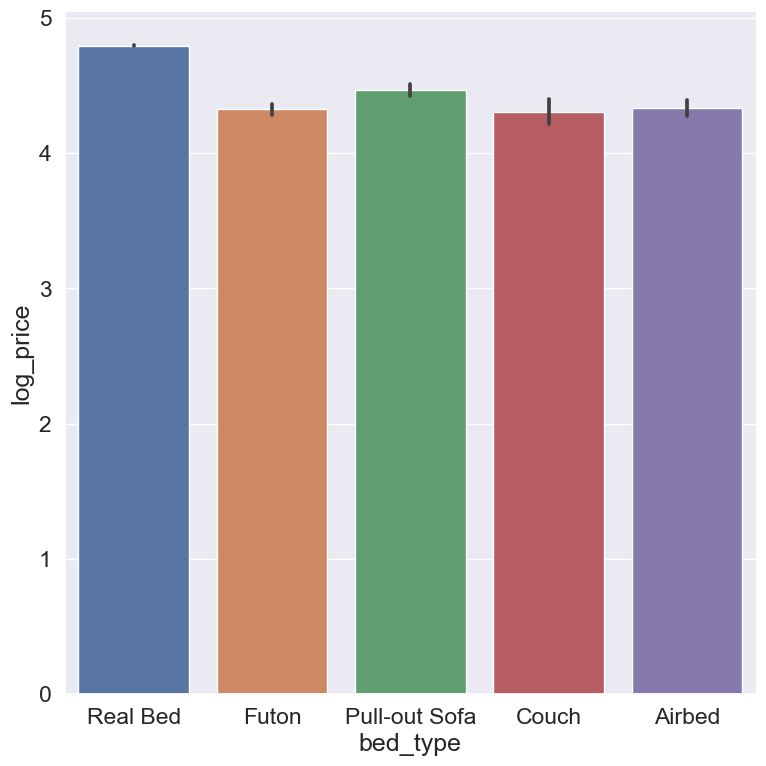

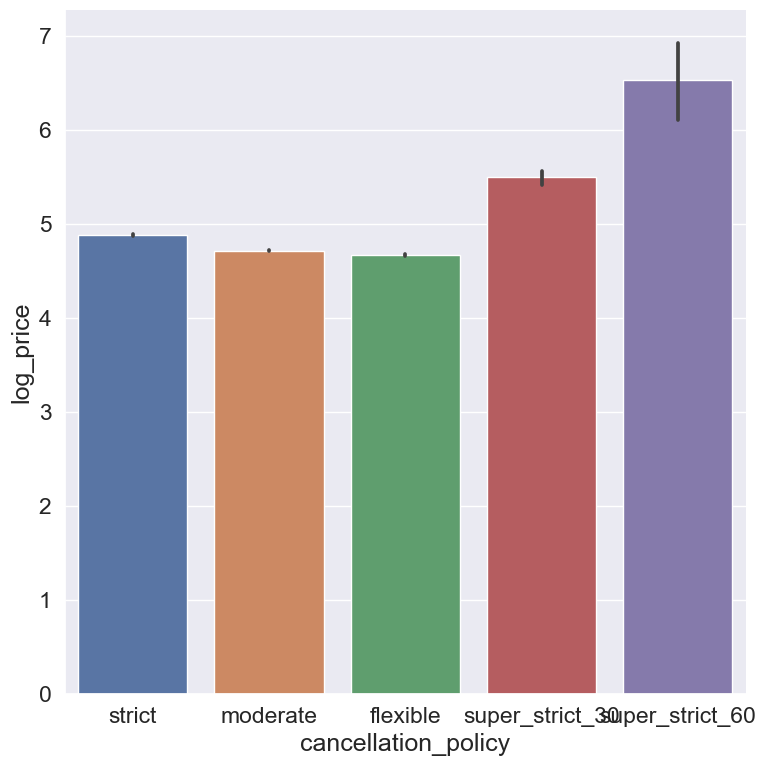

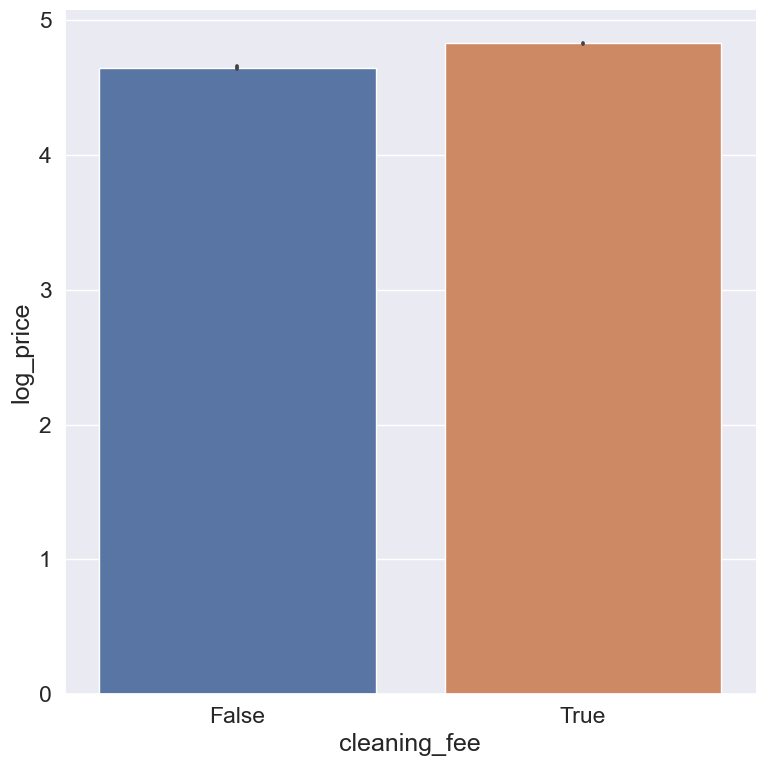

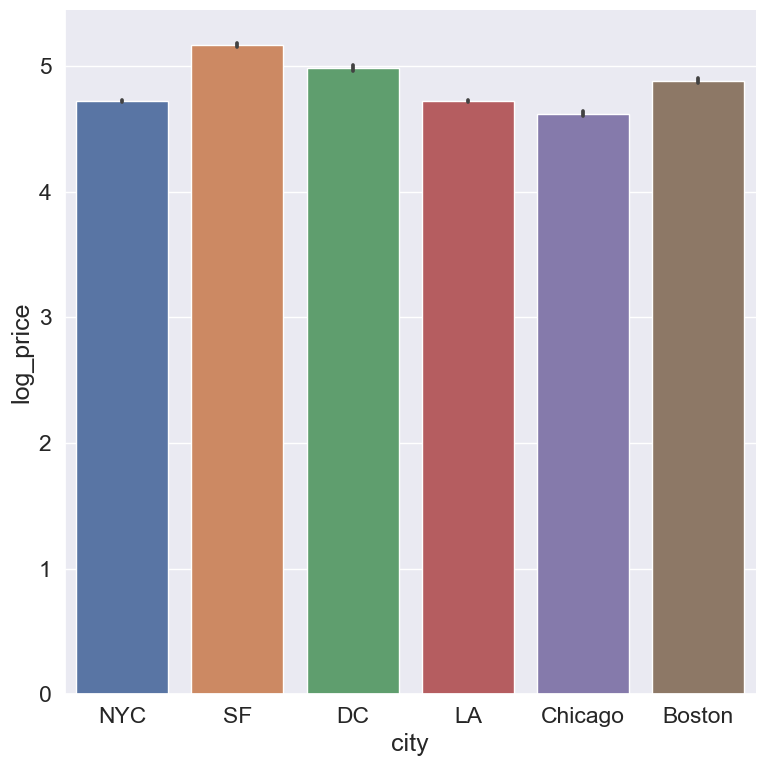

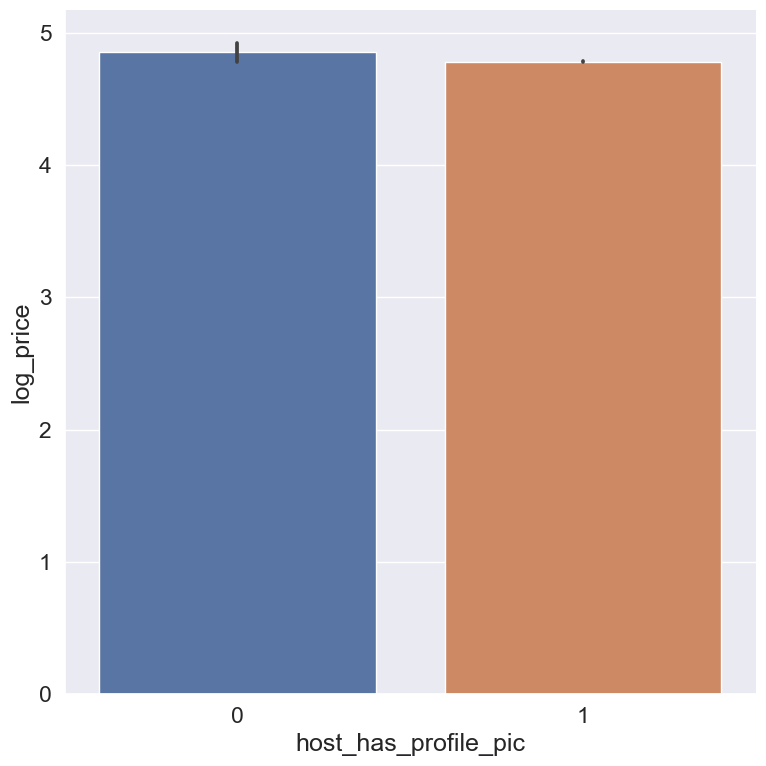

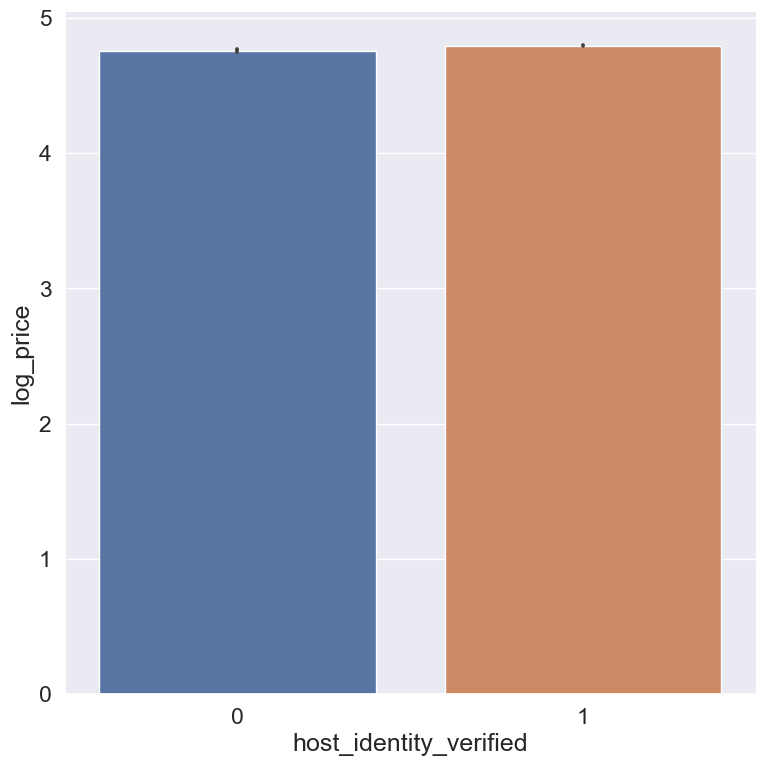

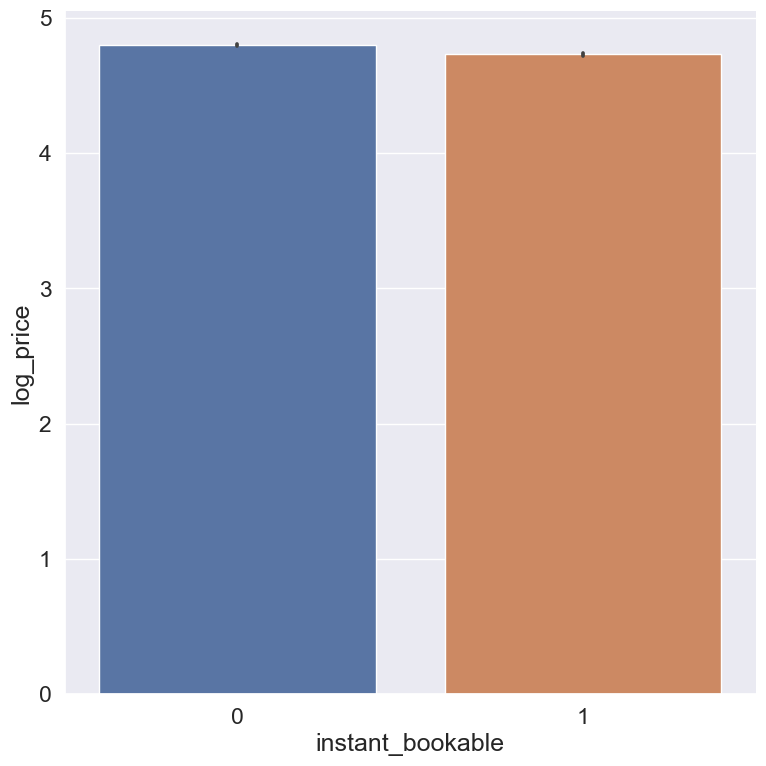

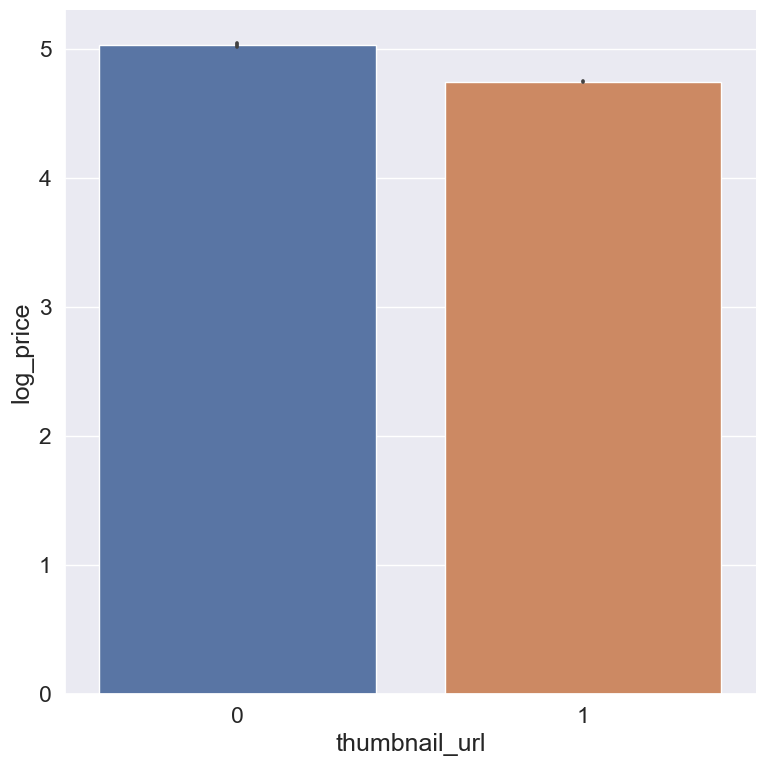

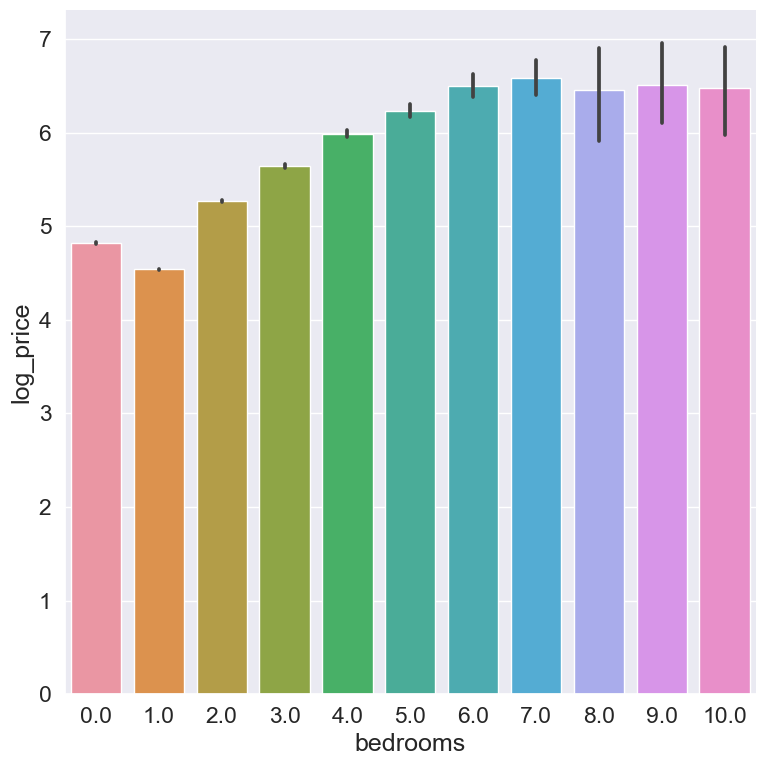

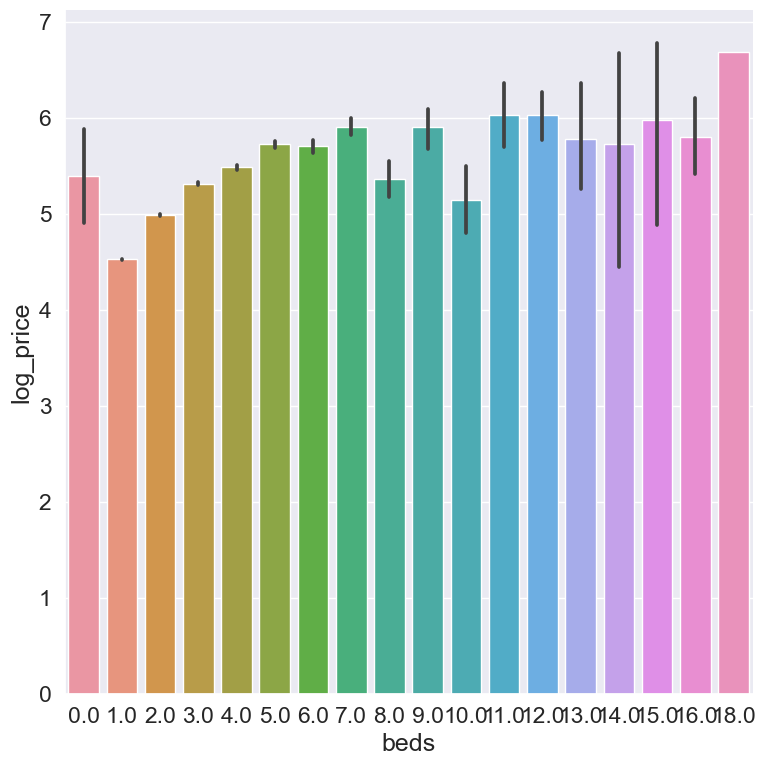

In [516]:
for i in df.columns :
    catplot(i)

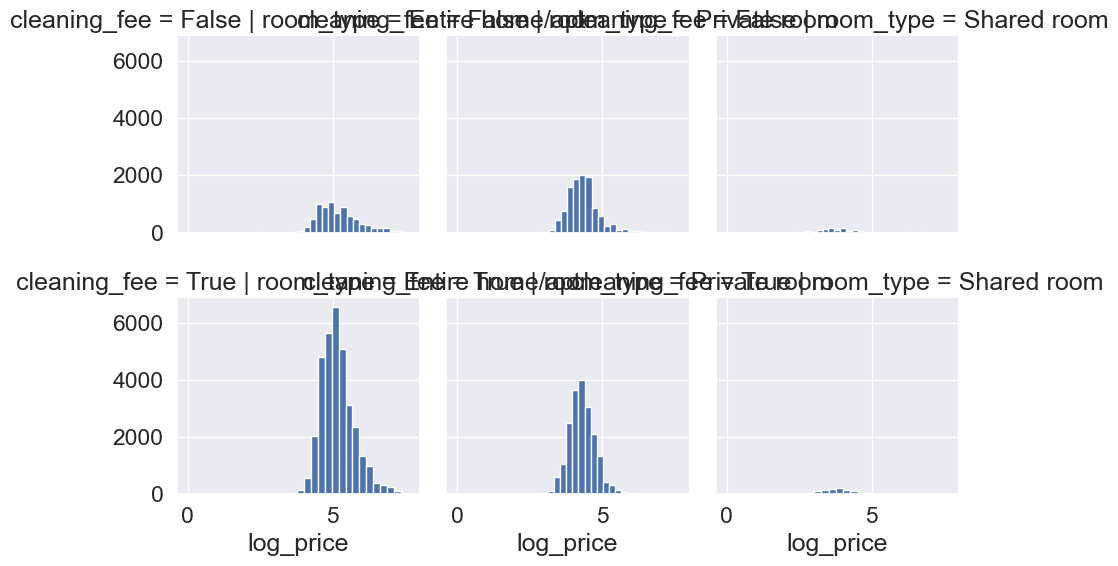

In [517]:
# Duzen yapilacak - unique degerleri az olanlarla denenecek
g = sns.FacetGrid(df, col = "room_type", row = "cleaning_fee")
g.map(plt.hist, "log_price", bins = 25)

plt.show()

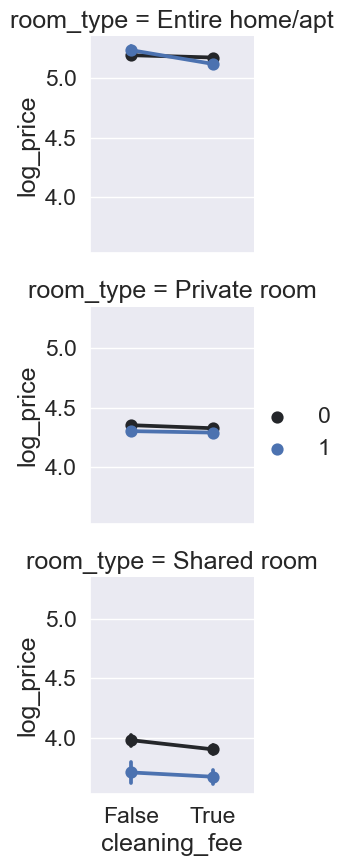

In [518]:
# ayni sekilde

g = sns.FacetGrid(df, row = "room_type")
g.map(sns.pointplot, "cleaning_fee","log_price","instant_bookable")
g.add_legend()
plt.show()

In [519]:
# ayni sekilde
g = sns.FacetGrid(df, row = "Embarked", col = "Survived", size = 2.3)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

TypeError: __init__() got an unexpected keyword argument 'size'

#### -neighbourhood. Williamsburg is most populer. Its open to further calculations

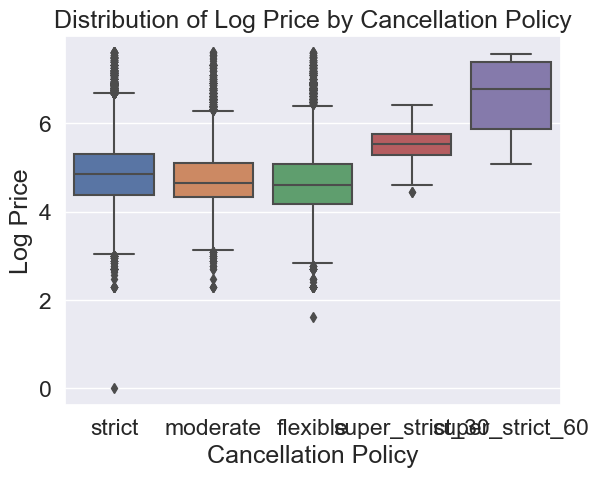

In [520]:
import seaborn as sns

sns.boxplot(x="cancellation_policy", y="log_price", data=df)
plt.xlabel("Cancellation Policy")
plt.ylabel("Log Price")
plt.title("Distribution of Log Price by Cancellation Policy")
plt.show()

In [521]:
def box_plot_target(df,column):
    sns.boxplot(x=column, y="log_price", data=df)
    plt.xlabel(f"{column}")
    plt.ylabel("Log Price")
    plt.title(f"Distribution of Log Price by {column}")
    plt.show()

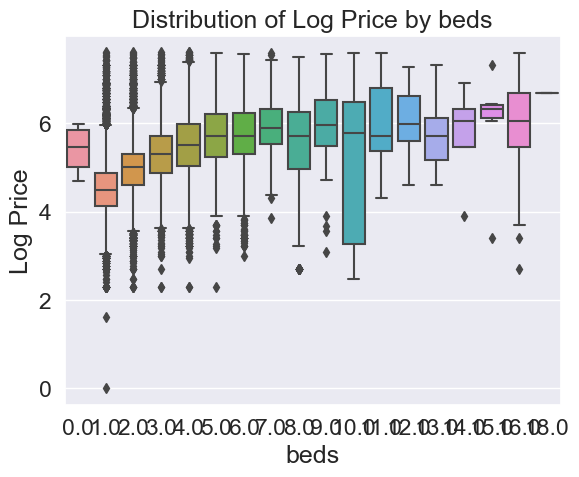

In [522]:
box_plot_target(df,'beds')

# OUTLIER HANDLE

In [523]:
def show_outliers(df,column):
    '''
    Visialize outliers of given column
    '''
    plt.figure(figsize=(8, 6))
    plt.boxplot(x=df[column],patch_artist=True ,boxprops=dict(facecolor='lightblue', linewidth=2, edgecolor='black'))
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.title('Outliers Plot of '+ column)
    plt.show()

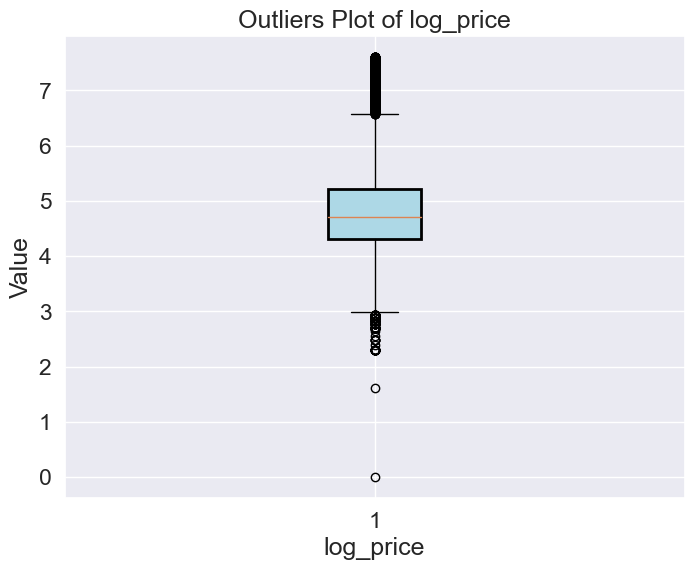

In [524]:
#check outliers
show_outliers(df,'log_price')

#### First method of handling outliers with IQR and quantiles

In [84]:
def outliers_iqr(df,column):
    '''
    first method of handling outliers with IQR and quantiles
    '''
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5
    df_clean = df[(df[column] > (Q1 - threshold * IQR)) & (df[column] < (Q3 + threshold * IQR))]
    print("max value is : ",df_clean[column].max())
    print("min value is : ",df_clean[column].min())
    print((df.shape[0]-df_clean.shape[0])," rows removed in total")
    
    return df_clean

In [86]:
df_iqr = outliers_iqr(df,"log_price")

max value is :  6.572282542694008
min value is :  2.995732273553992
1532  rows removed in total


In [87]:
df_iqr = outliers_iqr(df_iqr,"number_of_reviews")

max value is :  58
min value is :  0
7814  rows removed in total


In [703]:
# lets the diffreence
def compare_dist(df,df1,column):
    plot_hist(df,column)
    plot_hist(df1,column)


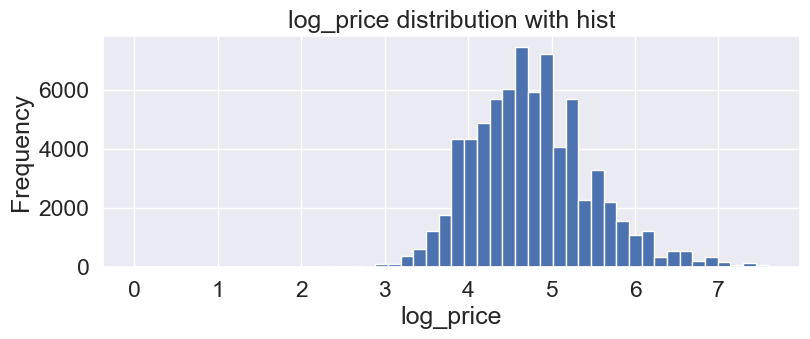

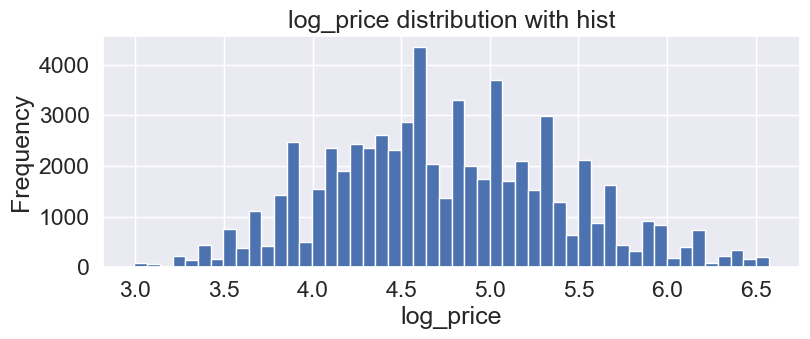

In [704]:
compare_dist(df,df_iqr,"log_price") # IQR method before and after

#### Second method of handling outliers by determining min and max value via quantiles

In [81]:
def remove_outliers(df, column, q1, q2):
    '''
    Second method of handling outliers with determining 'min' and 'max' value
    '''
    min_val = df[column].quantile(q1)
    max_val = df[column].quantile(q2)
    
    df_cleaned = df.loc[(df[column] >= min_val) & (df[column] <= max_val)].copy()
    print("max value is : ",df_cleaned[column].max())
    print("min value is : ",df_cleaned[column].min())
    print((df.shape[0]-df_cleaned.shape[0])," rows removed")
    return df_cleaned




In [88]:
cleaned_df = remove_outliers(df, 'log_price', 0.001, 0.998)

max value is :  7.3132203870903005
min value is :  2.7080502011022096
137  rows removed


In [89]:
cleaned_df =remove_outliers(cleaned_df,"number_of_reviews",0.01, 0.9997)

max value is :  388
min value is :  0
23  rows removed


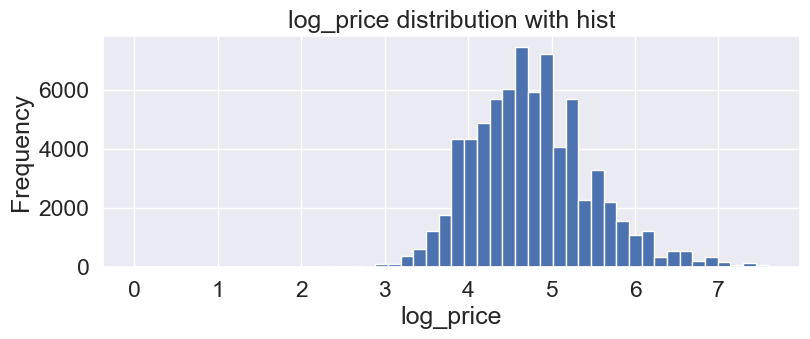

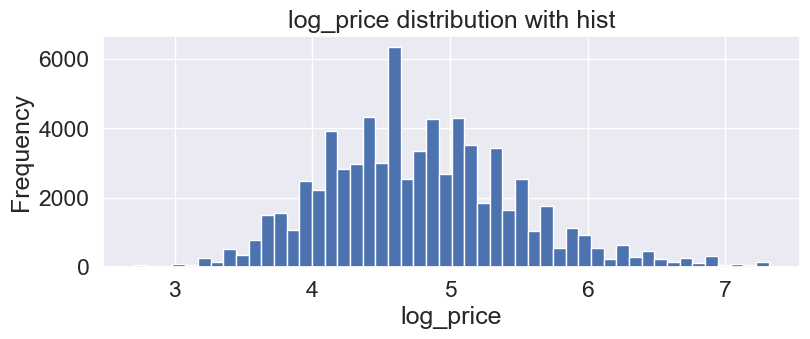

In [705]:
compare_dist(df,cleaned_df,"log_price") # min_max method before and after

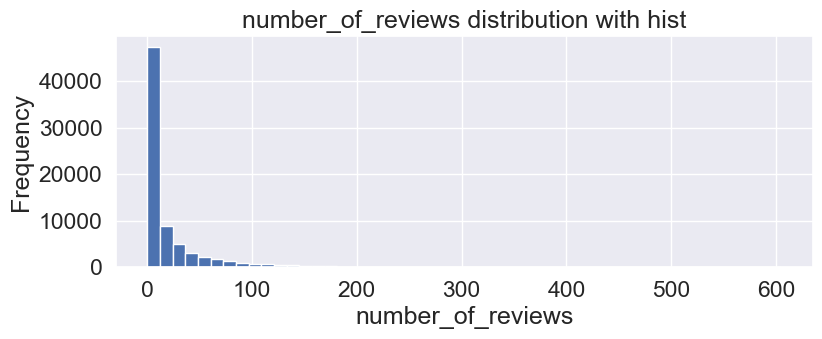

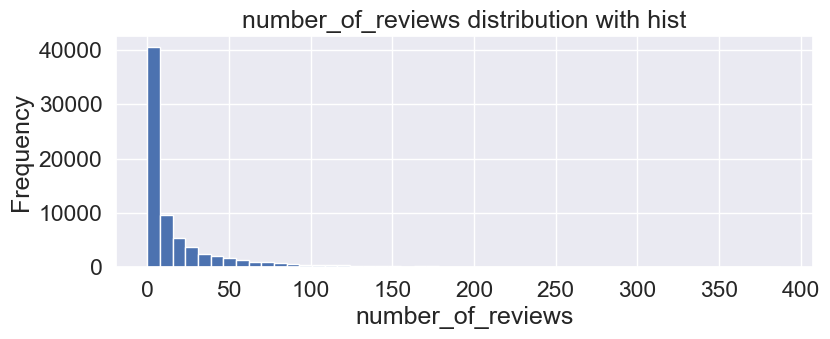

In [709]:
compare_dist(df,cleaned_df,"number_of_reviews") # min_max method before and after

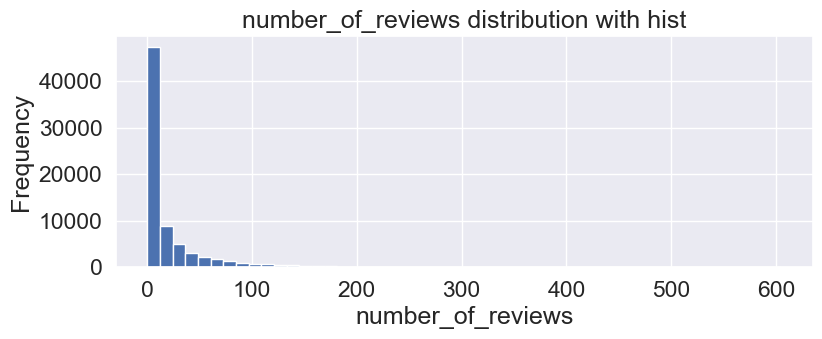

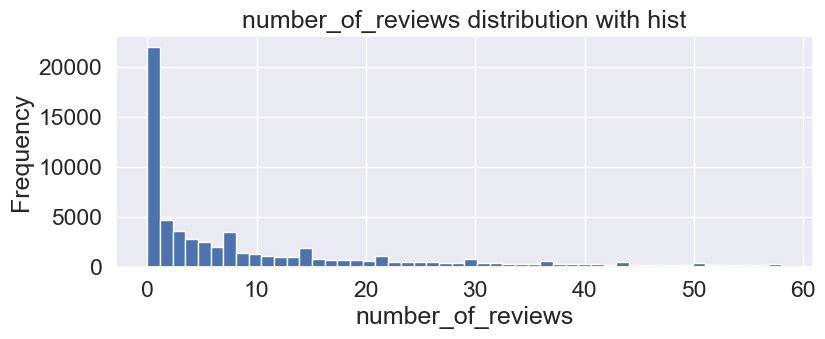

In [710]:
compare_dist(df,df_iqr,"number_of_reviews") # IQR method before and after

In [ ]:
def compare_outliers(df,df1,column):
    '''
    Compares before handling and after handling outliers
    '''
    plt.figure()
    plt.boxplot(df[column])
    plt.title(f"Box Plot for {column} before outliers handling")
    plt.show()

    plt.boxplot(x=df1[column],patch_artist=True ,boxprops=dict(facecolor='lightblue', linewidth=2, edgecolor='black'))
    # plt.boxplot(x=cleaned_df["log_price"])
    plt.title(f"Box Plot for {column} after outliers handling")
    plt.xlabel(column)
    plt.ylabel("Values")
    plt.show()

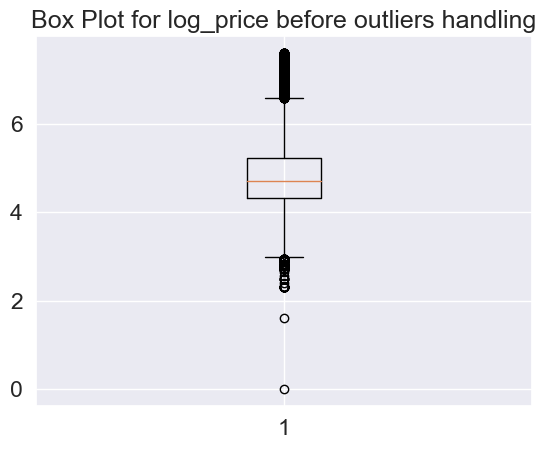

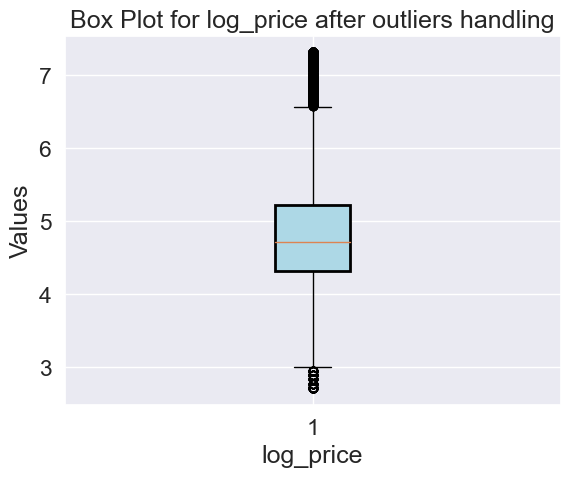

In [ ]:
compare_outliers(df,cleaned_df,"log_price")  # min_max method

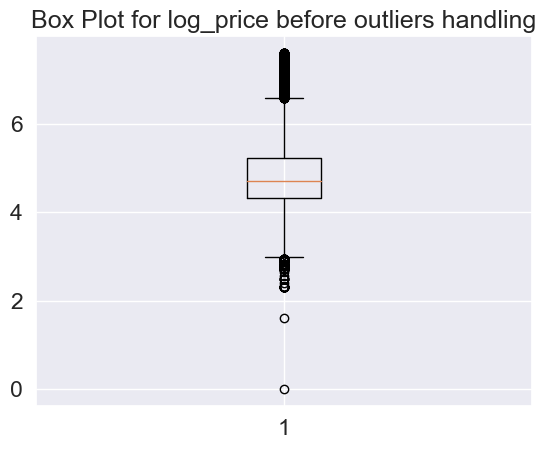

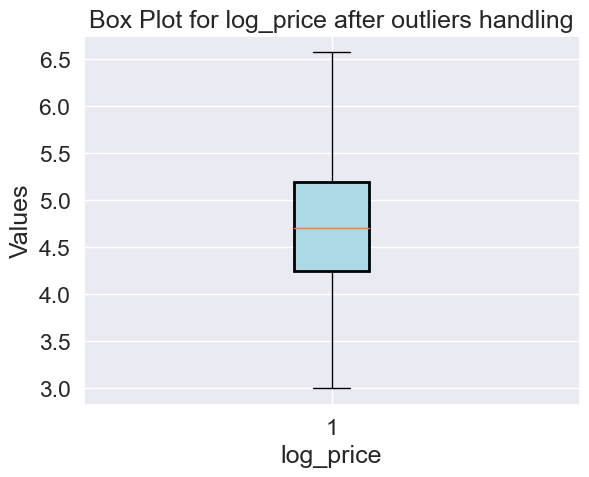

In [706]:
compare_outliers(df,df_iqr,"log_price")  # IQR method

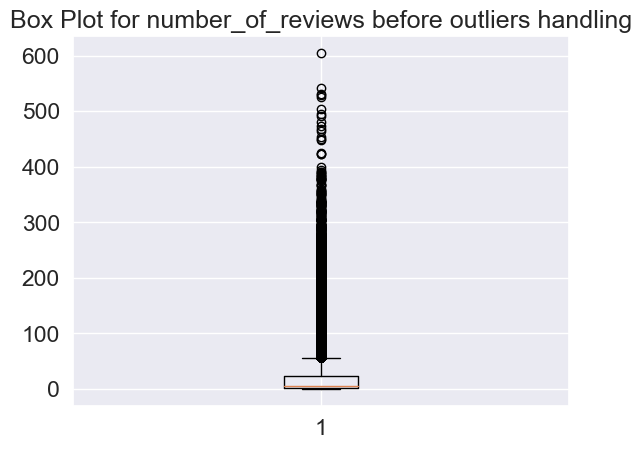

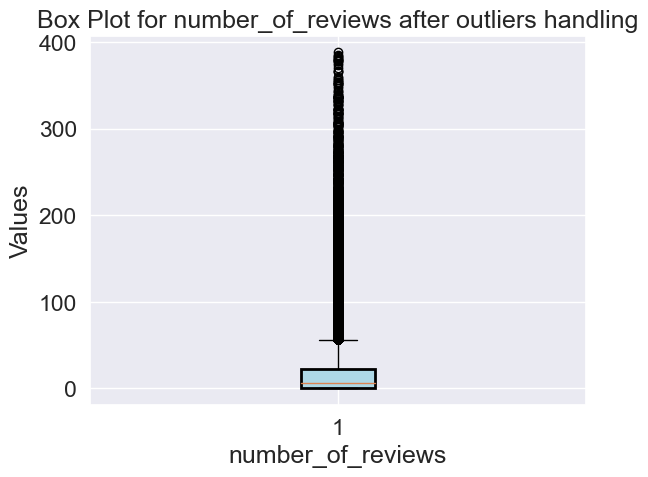

In [707]:
compare_outliers(df,cleaned_df,"number_of_reviews")  # min_max method

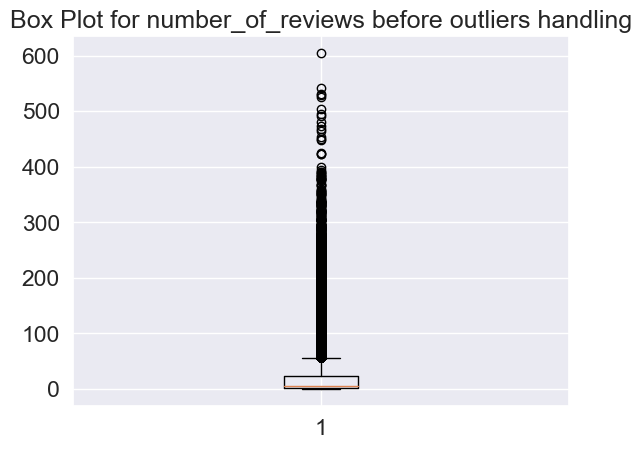

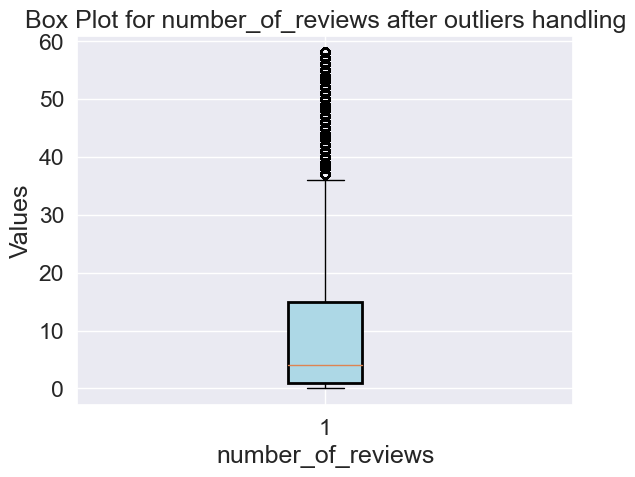

In [708]:
compare_outliers(df,df_iqr,"number_of_reviews") # IQR method

# FEATURE ENGINEERING

In [713]:
cleaned_df.isnull().sum()

log_price                 0    
property_type             0    
room_type                 0    
amenities                 0    
accommodates              0    
bathrooms                 0    
bed_type                  0    
cancellation_policy       0    
cleaning_fee              0    
city                      0    
description               0    
first_review              0    
host_has_profile_pic      0    
host_identity_verified    0    
host_response_rate        18247
host_since                0    
instant_bookable          0    
last_review               0    
latitude                  0    
longitude                 0    
name                      0    
neighbourhood             0    
number_of_reviews         0    
review_scores_rating      0    
thumbnail_url             0    
zipcode                   0    
bedrooms                  0    
beds                      0    
dtype: int64

## property_type

In [122]:
# Replacing categories that are types of houses or apartments
df.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Others'

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

sns.countplot(x="property_type", data =df)
plt.xticks(rotation = 60)
plt.show()

ValueError: Could not interpret input 'property_type'

In [19]:
g = sns.factorplot(x = "property_type", y = "log_price", data = df, kind = "bar")
g.set_xticklabels(["Apartment","House","Others"])
g.set_ylabels("log_price by property type")
plt.show()

AttributeError: module 'seaborn' has no attribute 'factorplot'

In [123]:
df = pd.get_dummies(df,columns=["property_type"])
df.head()

,id,log_price,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,property_type_Apartment,property_type_House,property_type_Others
0,6901257,5.010635,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1,Real Bed,strict,True,NYC,...,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,1,0,0
1,6304928,5.129899,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1,Real Bed,strict,True,NYC,...,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,1,0,0
2,7919400,4.976734,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1,Real Bed,moderate,True,NYC,...,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,1,0,0
3,13418779,6.620073,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1,Real Bed,flexible,True,SF,...,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,0,1,0
4,3808709,4.744932,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1,Real Bed,moderate,True,DC,...,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,1,0,0


## accomodates

## cancellation_policy

In [124]:
import pandas as pd



# transformed cancellation_policy 
df['cancellation_policy_transformed'] = df['cancellation_policy'].replace({
    'super_strict_30': 'strict',
    'super_strict_60': 'strict'
})

df['cancellation_policy_transformed'].value_counts()

strict      32503
flexible    22545
moderate    19063
Name: cancellation_policy_transformed, dtype: int64

In [125]:
df = pd.get_dummies(df,columns=["cancellation_policy_transformed"])
df.head()

,id,log_price,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,thumbnail_url,zipcode,bedrooms,beds,property_type_Apartment,property_type_House,property_type_Others,cancellation_policy_transformed_flexible,cancellation_policy_transformed_moderate,cancellation_policy_transformed_strict
0,6901257,5.010635,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1,Real Bed,strict,True,NYC,...,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,1,0,0,0,0,1
1,6304928,5.129899,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1,Real Bed,strict,True,NYC,...,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,1,0,0,0,0,1
2,7919400,4.976734,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1,Real Bed,moderate,True,NYC,...,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,1,0,0,0,1,0
3,13418779,6.620073,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1,Real Bed,flexible,True,SF,...,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,0,1,0,1,0,0
4,3808709,4.744932,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1,Real Bed,moderate,True,DC,...,NaN,20009,0.0,1.0,1,0,0,0,1,0


## cleaning_fee

In [80]:
#df['cleaning_fee'] = df['cleaning_fee'].astype(int)



In [126]:
df = pd.get_dummies(df, columns=["cleaning_fee"])
df.head()

,id,log_price,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,city,description,...,bedrooms,beds,property_type_Apartment,property_type_House,property_type_Others,cancellation_policy_transformed_flexible,cancellation_policy_transformed_moderate,cancellation_policy_transformed_strict,cleaning_fee_False,cleaning_fee_True
0,6901257,5.010635,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1,Real Bed,strict,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",...,1.0,1.0,1,0,0,0,0,1,0,1
1,6304928,5.129899,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1,Real Bed,strict,NYC,Enjoy travelling during your stay in Manhattan...,...,3.0,3.0,1,0,0,0,0,1,0,1
2,7919400,4.976734,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1,Real Bed,moderate,NYC,The Oasis comes complete with a full backyard ...,...,1.0,3.0,1,0,0,0,1,0,0,1
3,13418779,6.620073,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1,Real Bed,flexible,SF,This light-filled home-away-from-home is super...,...,2.0,2.0,0,1,0,1,0,0,0,1
4,3808709,4.744932,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1,Real Bed,moderate,DC,"Cool, cozy, and comfortable studio located in ...",...,0.0,1.0,1,0,0,0,1,0,0,1


## bed_type

In [127]:
df['bed_type'] =df['bed_type'].apply(lambda x: 1 if x==1 else 0)


In [129]:
df = pd.get_dummies(df, columns=['bed_type'])#######???????????????
df.head()

,id,log_price,room_type,amenities,accommodates,bathrooms,cancellation_policy,city,description,first_review,...,beds,property_type_Apartment,property_type_House,property_type_Others,cancellation_policy_transformed_flexible,cancellation_policy_transformed_moderate,cancellation_policy_transformed_strict,cleaning_fee_False,cleaning_fee_True,bed_type_0
0,6901257,5.010635,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1,strict,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,...,1.0,1,0,0,0,0,1,0,1,1
1,6304928,5.129899,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1,strict,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,...,3.0,1,0,0,0,0,1,0,1,1
2,7919400,4.976734,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1,moderate,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,...,3.0,1,0,0,0,1,0,0,1,1
3,13418779,6.620073,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1,flexible,SF,This light-filled home-away-from-home is super...,NaN,...,2.0,0,1,0,1,0,0,0,1,1
4,3808709,4.744932,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1,moderate,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,...,1.0,1,0,0,0,1,0,0,1,1


In [109]:
df['room_type'].value_counts()

Entire home/apt    41310
Private room       30638
Shared room         2163
Name: room_type, dtype: int64

In [130]:
#df["room_type"] = train_df["room_type"].astype("category")?????????????????????????????
df = pd.get_dummies(df, columns=["room_type"])
df.head()

,id,log_price,amenities,accommodates,bathrooms,cancellation_policy,city,description,first_review,host_has_profile_pic,...,property_type_Others,cancellation_policy_transformed_flexible,cancellation_policy_transformed_moderate,cancellation_policy_transformed_strict,cleaning_fee_False,cleaning_fee_True,bed_type_0,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,6901257,5.010635,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1,strict,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,...,0,0,0,1,0,1,1,1,0,0
1,6304928,5.129899,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1,strict,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,...,0,0,0,1,0,1,1,1,0,0
2,7919400,4.976734,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1,moderate,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,...,0,0,1,0,0,1,1,1,0,0
3,13418779,6.620073,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1,flexible,SF,This light-filled home-away-from-home is super...,NaN,t,...,0,1,0,0,0,1,1,1,0,0
4,3808709,4.744932,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1,moderate,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,...,0,0,1,0,0,1,1,1,0,0


## bathrooms

In [120]:
df['bathrooms'].value_counts()

1.0    58099
2.0     7936
1.5     3801
2.5     1567
3.0     1066
3.5      429
4.0      286
0.5      209
0.0      198
4.5      116
5.0       72
8.0       41
5.5       39
6.0       24
6.5       12
7.0       10
7.5        6
Name: bathrooms, dtype: int64

In [131]:
df['bathrooms'] =df['bathrooms'].apply(lambda x: 1 if x==1 else 'other')

In [132]:
df = pd.get_dummies(df, columns=["bathrooms"])
df.head()


,id,log_price,amenities,accommodates,cancellation_policy,city,description,first_review,host_has_profile_pic,host_identity_verified,...,cancellation_policy_transformed_moderate,cancellation_policy_transformed_strict,cleaning_fee_False,cleaning_fee_True,bed_type_0,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bathrooms_1,bathrooms_other
0,6901257,5.010635,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,strict,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,...,0,1,0,1,1,1,0,0,1,0
1,6304928,5.129899,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,strict,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,...,0,1,0,1,1,1,0,0,1,0
2,7919400,4.976734,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,moderate,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,...,1,0,0,1,1,1,0,0,1,0
3,13418779,6.620073,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,flexible,SF,This light-filled home-away-from-home is super...,NaN,t,t,...,0,0,0,1,1,1,0,0,1,0
4,3808709,4.744932,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,moderate,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,...,1,0,0,1,1,1,0,0,1,0


In [116]:
df.columns

Index(['id', 'log_price', 'property_type', 'amenities', 'accommodates',
       'cancellation_policy', 'cleaning_fee', 'city', 'description',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review',
       'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'bed_type_0', 'bed_type_1', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room', 'bathrooms_other'],
      dtype='object')

## amenities

In [62]:
# amenities
amenities_df = df['amenities']
amenities_df[:5]

0    {"Wireless Internet","Air conditioning",Kitche...
1    {"Wireless Internet","Air conditioning",Kitche...
2    {TV,"Cable TV","Wireless Internet","Air condit...
3    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
4    {TV,Internet,"Wireless Internet","Air conditio...
Name: amenities, dtype: object

In [63]:
amenities_df = amenities_df[amenities_df != '{}']


In [65]:
amenities_list = []

for index, row in amenities_df.items():
    amenities_list.append(row.replace('{','').replace('}','').replace('"','').split(','))

amenities_list[:3]

[['Wireless Internet',
  'Air conditioning',
  'Kitchen',
  'Heating',
  'Family/kid friendly',
  'Essentials',
  'Hair dryer',
  'Iron',
  'translation missing: en.hosting_amenity_50'],
 ['Wireless Internet',
  'Air conditioning',
  'Kitchen',
  'Heating',
  'Family/kid friendly',
  'Washer',
  'Dryer',
  'Smoke detector',
  'Fire extinguisher',
  'Essentials',
  'Shampoo',
  'Hangers',
  'Hair dryer',
  'Iron',
  'translation missing: en.hosting_amenity_50'],
 ['TV',
  'Cable TV',
  'Wireless Internet',
  'Air conditioning',
  'Kitchen',
  'Breakfast',
  'Buzzer/wireless intercom',
  'Heating',
  'Family/kid friendly',
  'Smoke detector',
  'Carbon monoxide detector',
  'Fire extinguisher',
  'Essentials',
  'Shampoo',
  'Hangers',
  'Hair dryer',
  'Iron',
  'Laptop friendly workspace',
  'translation missing: en.hosting_amenity_50']]

In [66]:
# Create a new ammenities df

new_amenities_df = pd.Series(amenities_list, name = 'amenities').to_frame()
new_amenities_df


,amenities
0,"[Wireless Internet, Air conditioning, Kitchen,..."
1,"[Wireless Internet, Air conditioning, Kitchen,..."
2,"[TV, Cable TV, Wireless Internet, Air conditio..."
3,"[TV, Cable TV, Internet, Wireless Internet, Ki..."
4,"[TV, Internet, Wireless Internet, Air conditio..."
...,...
73520,"[TV, Internet, Wireless Internet, Air conditio..."
73521,"[TV, Cable TV, Internet, Wireless Internet, Ki..."
73522,"[TV, Internet, Wireless Internet, Air conditio..."
73523,"[TV, Wireless Internet, Air conditioning, Kitc..."


In [67]:
dummies_amenities_df = new_amenities_df.drop('amenities', 1).join(
    pd.get_dummies(
        pd.DataFrame(new_amenities_df.amenities.tolist()).stack()
    ).astype(int).sum(level=0)
)

dummies_amenities_df

,smooth pathway to front door,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,...,Wide clearance to bed,Wide clearance to shower & toilet,Wide clearance to shower and toilet,Wide doorway,Wide entryway,Wide hallway clearance,Window guards,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73520,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
73521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
73522,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
73523,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [68]:
dummies_amenities_df.sum().sort_values( ascending=False)

Wireless Internet      71265
Kitchen                67526
Heating                67073
Essentials             64005
Smoke detector         61727
                       ...  
Hand or paper towel        1
Toilet paper               1
Hand soap                  1
Bath towel                 1
Body soap                  1
Length: 130, dtype: int64

In [69]:
dummies_amenities_df[dummies_amenities_df['Washer / Dryer'] == 1]

,smooth pathway to front door,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,...,Wide clearance to bed,Wide clearance to shower & toilet,Wide clearance to shower and toilet,Wide doorway,Wide entryway,Wide hallway clearance,Window guards,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
2637,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5746,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14041,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16107,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21364,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23813,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24631,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [70]:
dummies_amenities_df = dummies_amenities_df.drop(columns = ['Washer / Dryer'])


In [ ]:
def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    df.groupby(col).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    df.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price ()')
    ax2.set_xlabel('')
    return 

In [ ]:
for col in df.iloc[:, :2].columns:
    binary_count_and_price_plot(col, figsize=(6,2))

<Axes: >

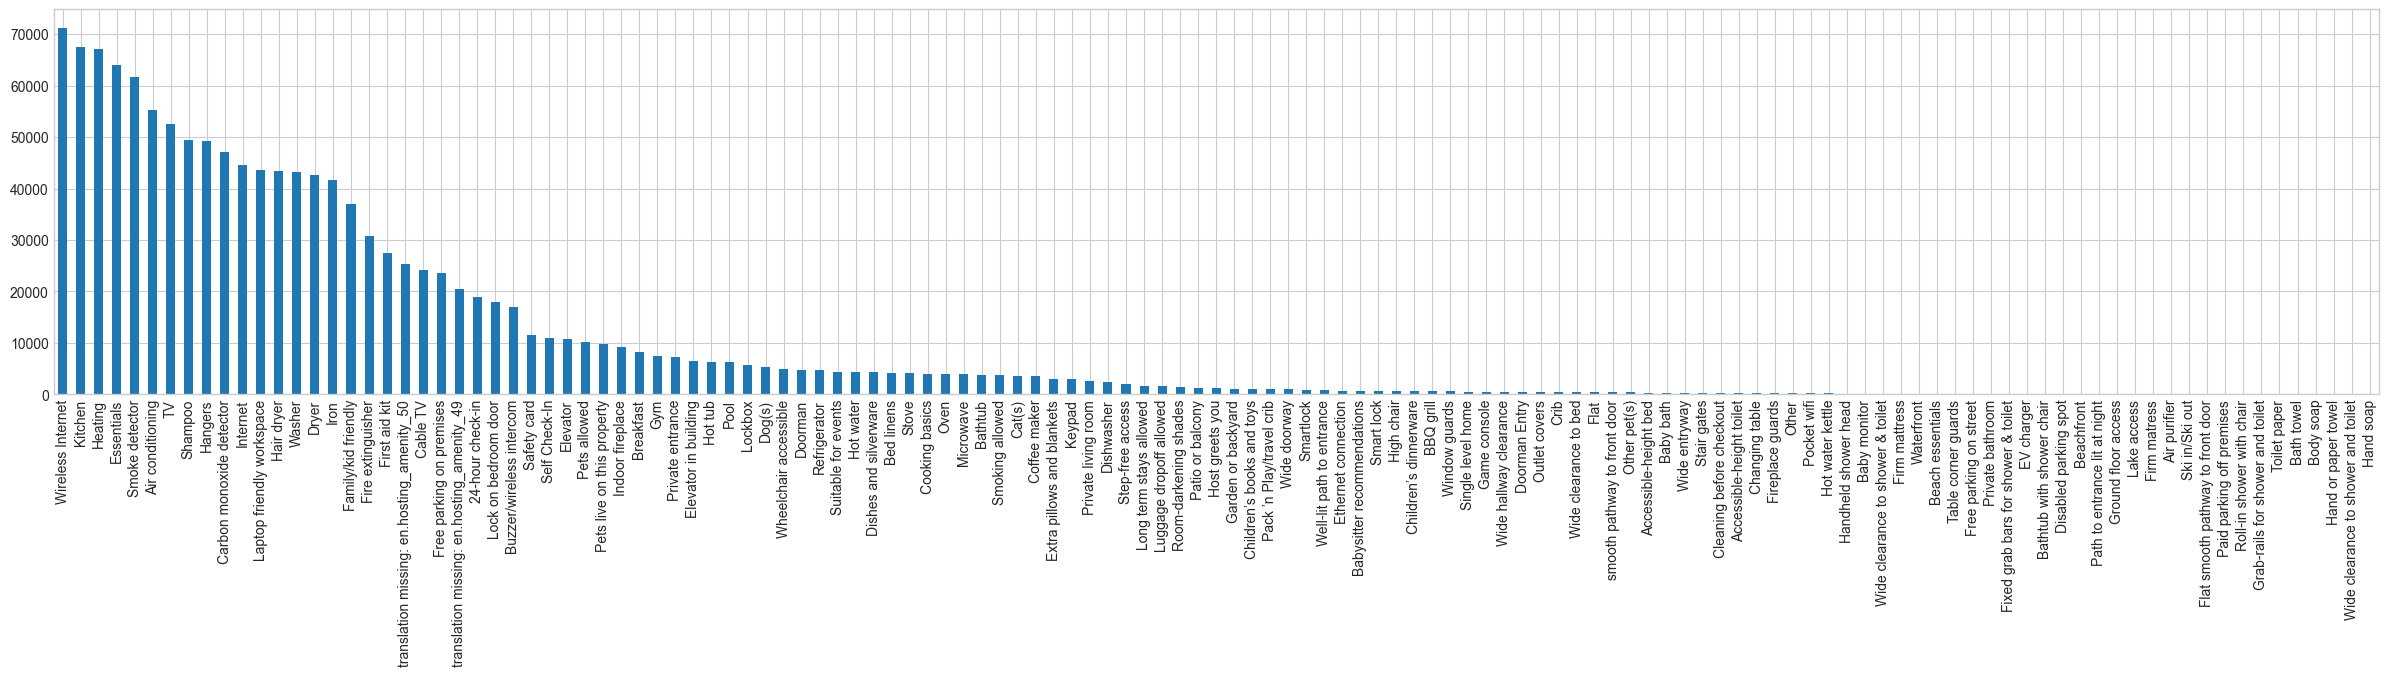

In [71]:
dummies_amenities_df.sum().sort_values(ascending = False).plot(kind='bar', figsize = (30,5))

## most importance columns detection

In [150]:
df_amenities_importance=dummies_amenities_df.sum().sort_values(ascending=False).head(26)

In [151]:
df_amenities_importance

Wireless Internet                             71265
Kitchen                                       67526
Heating                                       67073
Essentials                                    64005
Smoke detector                                61727
Air conditioning                              55210
TV                                            52458
Shampoo                                       49465
Hangers                                       49173
Carbon monoxide detector                      47190
Internet                                      44648
Laptop friendly workspace                     43703
Hair dryer                                    43330
Washer                                        43169
Dryer                                         42711
Iron                                          41687
Family/kid friendly                           37026
Fire extinguisher                             30724
First aid kit                                 27532
translation 

In [135]:
g = sns.catplot(x='Wireless Internet', y="log_price", data=dummies_amenities_df, kind="bar", height=8)
g.set_ylabels("log_price")??????
plt.show()

ValueError: Could not interpret input 'log_price'

## city

In [127]:
df['city']

0        NYC
1        NYC
2        NYC
3         SF
4         DC
        ... 
74106    NYC
74107     LA
74108    NYC
74109    NYC
74110     LA
Name: city, Length: 74111, dtype: object

In [159]:
df = pd.concat([df, pd.get_dummies(df['city'])], axis=1)
df.head()

,id,log_price,amenities,accommodates,cancellation_policy,city,description,first_review,host_has_profile_pic,host_identity_verified,...,DC,LA,NYC,SF,Boston,Chicago,DC,LA,NYC,SF
0,6901257.0,5.010635,"{""Wireless Internet"",""Air conditioning"",Kitche...",3.0,strict,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,...,0,0,1,0,0,0,0,0,1,0
1,6304928.0,5.129899,"{""Wireless Internet"",""Air conditioning"",Kitche...",7.0,strict,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,...,0,0,1,0,0,0,0,0,1,0
2,7919400.0,4.976734,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5.0,moderate,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,...,0,0,1,0,0,0,0,0,1,0
3,13418779.0,6.620073,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4.0,flexible,SF,This light-filled home-away-from-home is super...,NaN,t,t,...,0,0,0,1,0,0,0,0,0,1
4,3808709.0,4.744932,"{TV,Internet,""Wireless Internet"",""Air conditio...",2.0,moderate,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,...,1,0,0,0,0,0,1,0,0,0


## last review

In [ ]:
# Converting to datetime
df.first_review = pd.to_datetime(df.first_review) 

In [ ]:
# we create a new column named 'time_since_last_review'
import datetime
df['time_since_last_review'] = (datetime.datetime.today() - pd.to_datetime(df['last_review'])).dt.days
df['time_since_last_review']

In [ ]:
#we check corelation between log_price
correlation = df['time_since_last_review'].corr(df['log_price'])
correlation

## host since

In [108]:
df.host_since = pd.to_datetime(df.host_since) # Converting to datetime

In [109]:
# we create a new column named 'host_since_day'
import datetime
df['host_since_day'] = (datetime.datetime.today() - pd.to_datetime(df['host_since'])).dt.days
df['host_since_day']

0        4126
1        2215
2        2452
3        3007
4        3056
         ... 
74106    3763
74107    2627
74108    4207
74109    2125
74110    3881
Name: host_since_day, Length: 74111, dtype: int32

In [17]:
#we check corelation between log_price
correlation = df['host_since_day'].corr(df['log_price'])
correlation

0.07833307798072495

## host_response_rate

In [5]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')
df['host_response_rate']

0          NaN
1        100.0
2        100.0
3          NaN
4        100.0
         ...  
74106      NaN
74107    100.0
74108    100.0
74109    100.0
74110    100.0
Name: host_response_rate, Length: 74111, dtype: float64

In [6]:
# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

host_response_rate
100%       43254
unknown    18299
50-89%      7291
90-99%      3192
0-49%       2075
Name: count, dtype: int64

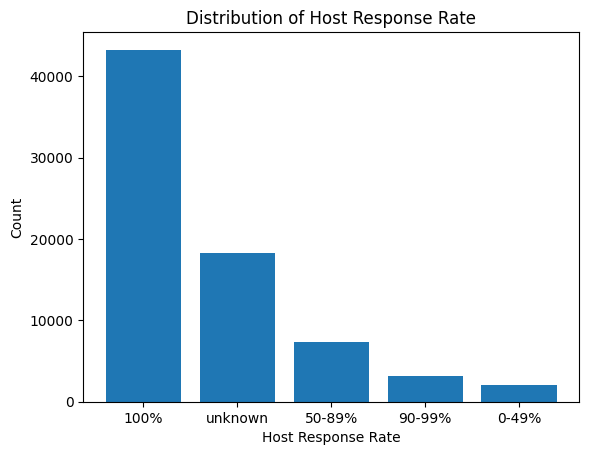

In [21]:
import matplotlib.pyplot as plt

plt.bar(df.host_response_rate.value_counts().index, df.host_response_rate.value_counts().values)
plt.xlabel('Host Response Rate')
plt.ylabel('Count')
plt.title('Distribution of Host Response Rate')
plt.show()


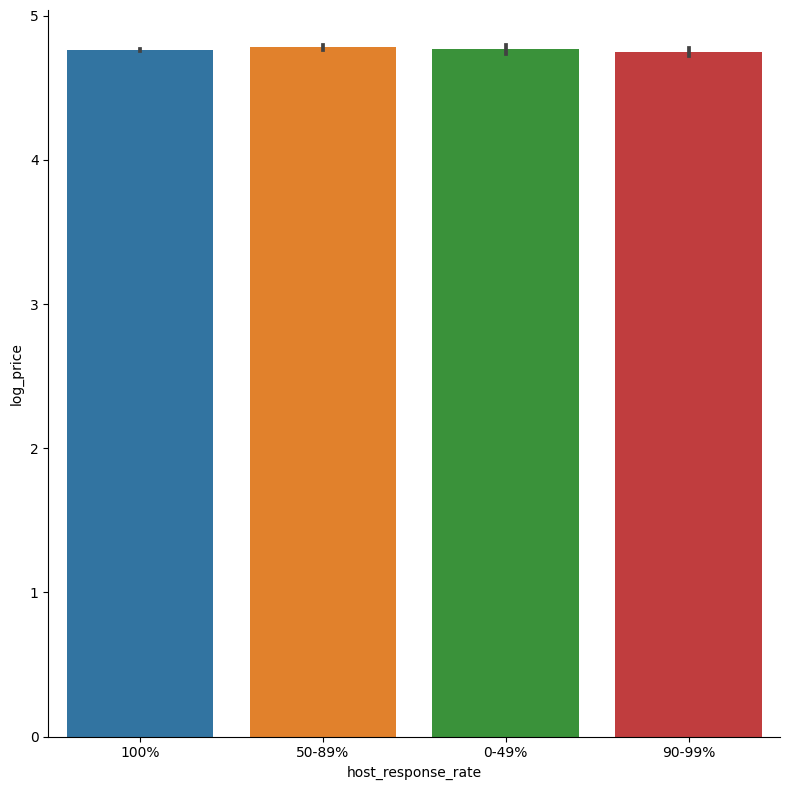

In [111]:
catplot('host_response_rate')

## review_scores_rating

In [9]:
df['review_scores_rating']

0        100.0
1         93.0
2         92.0
3          NaN
4         40.0
         ...  
74106      NaN
74107     93.0
74108     94.0
74109      NaN
74110     96.0
Name: review_scores_rating, Length: 74111, dtype: float64

In [10]:
# Bin into four categories
df.review_scores_rating = pd.cut(df.review_scores_rating, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.review_scores_rating = df.review_scores_rating.astype('str')

# Replace nulls with 'unknown'
df.review_scores_rating.replace('nan', 'unknown', inplace=True)

# Category counts
df.review_scores_rating.value_counts()

review_scores_rating
90-99%     28830
unknown    16722
100%       16215
50-89%     12114
0-49%        230
Name: count, dtype: int64

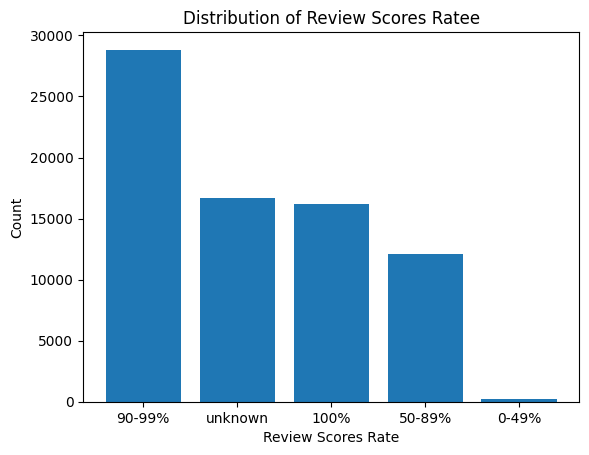

In [22]:
import matplotlib.pyplot as plt

plt.bar(df.review_scores_rating.value_counts().index, df.review_scores_rating.value_counts().values)
plt.xlabel('Review Scores Rate')
plt.ylabel('Count')
plt.title('Distribution of Review Scores Rating')
plt.show()


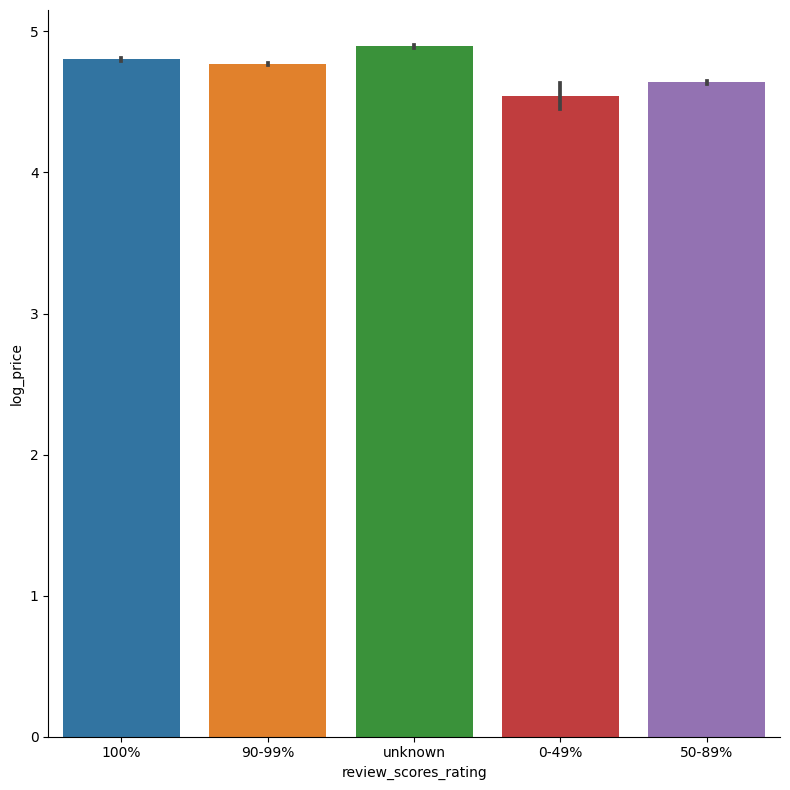

In [113]:
catplot('review_scores_rating')

## host_has_profile_pic

In [28]:
#We changed the true ones 1 the false ones 0 and filled the nan values with 0
df.loc[df.host_has_profile_pic == 't', 'host_has_profile_pic'] = 1
df.loc[df.host_has_profile_pic == 'f', 'host_has_profile_pic'] = 0

## host_identity_verified

In [27]:
#We changed the true ones 1 the false ones 0 and filled the nan values with 0
df.loc[df.host_identity_verified == 't', 'host_identity_verified'] = 1
df.loc[df.host_identity_verified == 'f', 'host_identity_verified'] = 0

## instant_bookable

In [16]:
#We changed the true ones 1 the false ones 0 
df.loc[df.instant_bookable == 't', 'instant_bookable'] = 1
df.loc[df.instant_bookable == 'f', 'instant_bookable'] = 0

## super_host

In [23]:
df['host_since_day'].mean()

3278.9200248907646

In [24]:
df['host_since_day'].min()

2108.0

In [90]:
df_iqr['number_of_reviews'].describe()

count    64765.000000
mean        10.486605
std         13.818450
min          0.000000
25%          1.000000
50%          4.000000
75%         15.000000
max         58.000000
Name: number_of_reviews, dtype: float64

In [123]:
df['super_host'] = ((df['host_since_day'] > df['host_since_day'].mean()) &
                    (df['host_identity_verified'] == 1) &
                    (df['host_has_profile_pic'] == 1) &
                    ((df['host_response_rate'] == '90-99%') | (df['host_response_rate'] == '100%')) &
                    ((df['review_scores_rating'] == '90-99%') | (df['review_scores_rating'] == '100%'))
)

df['super_host']

0        False
1        False
2        False
3        False
4        False
         ...  
74106    False
74107    False
74108     True
74109    False
74110     True
Name: super_host, Length: 74111, dtype: bool

In [53]:
#We changed the true ones 1 the false ones 0 
df.loc[df.super_host == 't', 'super_host'] = 1
df.loc[df.super_host == 'f', 'super_host'] = 0

In [124]:
df['super_host'].value_counts()

super_host
False    60324
True     13787
Name: count, dtype: int64

In [125]:
correlation = df['super_host'].corr(df['log_price'])
correlation

0.04476526619870984

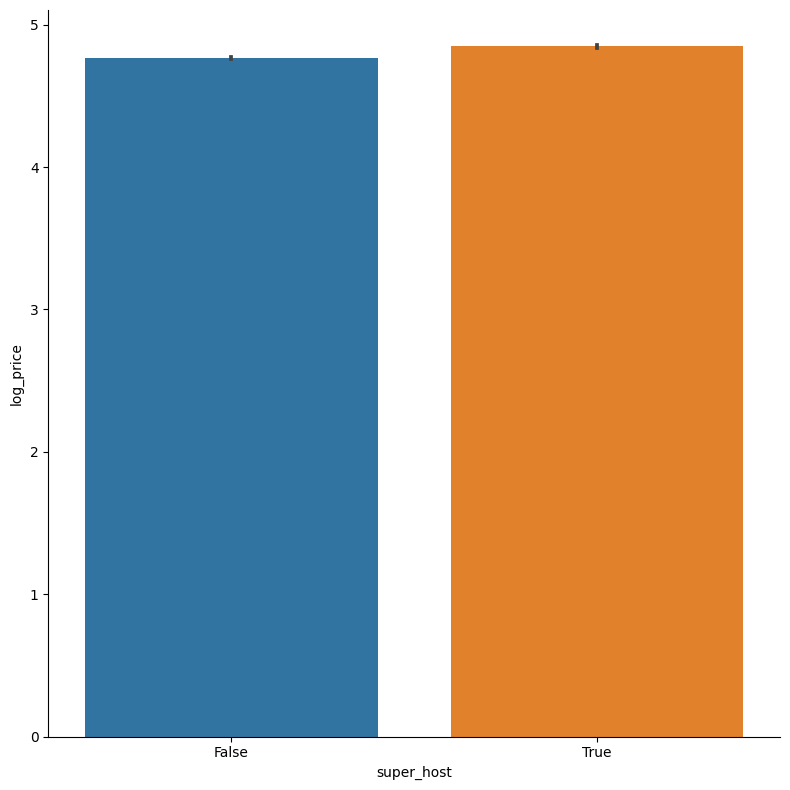

In [126]:
import seaborn as sns 
catplot('super_host')

### 30-median_home_value(Feature engineering)


In [148]:
# Creates a new column that gives us median house value of given zipcode

def get_median_home_value(zipcode):
    search = SearchEngine()
    zipcode_data = search.by_zipcode(zipcode)
    median_home_value = None
    if zipcode_data is not None:
        median_home_value = zipcode_data.median_home_value
    search.close()
    return median_home_value

# Iterate over the df rows
for index, row in df.iterrows():
    median_home_value = get_median_home_value(row['zipcode'])
    df.loc[index, 'median_home_value'] = median_home_value

In [149]:
# Checking if there is missing values
df['median_home_value'].isnull().sum()

4445

In [150]:
# Lets handle missing values
df['median_home_value'] = df['median_home_value'].fillna(df['median_home_value'].mean())

In [160]:
df['distance_to_center'].describe()

count    74111.000000
mean     0.095750    
std      0.086969    
min      0.000114    
25%      0.036579    
50%      0.071346    
75%      0.120092    
max      0.766622    
Name: distance_to_center, dtype: float64

## distance_to_center

In [152]:
# Defining center coordinates of each city

for index, row in df.iterrows():
    if df.loc[index, 'city'] == 'NYC':
        df.loc[index, 'lat_center'] = 40.72
        df.loc[index, 'long_center'] = -74.0060
    elif df.loc[index, 'city'] == 'LA':
        df.loc[index, 'lat_center'] = 34.0522
        df.loc[index, 'long_center'] = -118.2437
    elif df.loc[index, 'city'] == 'SF':
        df.loc[index, 'lat_center'] = 37.7749
        df.loc[index, 'long_center'] = -122.4194
    elif df.loc[index, 'city'] == 'DC':
        df.loc[index, 'lat_center'] = 38.9072
        df.loc[index, 'long_center'] = -77.0369
    elif df.loc[index, 'city'] == 'Chicago':
        df.loc[index, 'lat_center'] = 41.8781
        df.loc[index, 'long_center'] = -87.6298
    elif df.loc[index, 'city'] == 'Boston':
        df.loc[index, 'lat_center'] = 42.3601
        df.loc[index, 'long_center'] = -71.0589
        

In [153]:
# Creates the new column
df['distance_to_center']=np.sqrt((df['lat_center']-df['latitude'])**2+(df['long_center']-df['longitude'])**2)

In [155]:
def corr_columns(df,c1):
    print (np.corrcoef(df[c1], df['log_price']))
    sns.regplot(x=df[c1],y=df['log_price'],fit_reg=True,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    plt.show()

In [154]:
# lets see how our new column effect log_price
corr_columns(df,'distance_to_center')

[[ 1.         -0.13246795]
 [-0.13246795  1.        ]]


[[1.         0.29966923]
 [0.29966923 1.        ]]


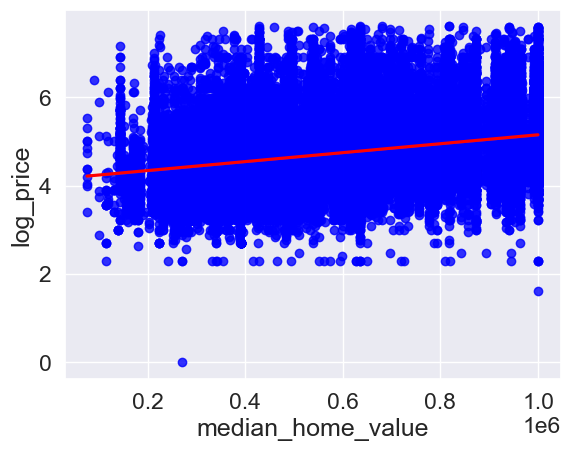

In [158]:
corr_columns(df,'median_home_value')